In [2]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit, fsolve
from scipy.special import jv
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.rc('lines', markersize = 3, linewidth = 0.75)
plt.rc('axes', grid = True, labelsize = 12)
plt.rc('axes.grid', which = 'both')
plt.rc('grid', color = 'grey')
plt.rc('xtick.minor', bottom = True, top = False)
plt.rc('ytick.minor', left = True, right = False)
plt.rc('xtick', bottom = True, top = False, direction = 'out', labelsize = 8)
plt.rc('ytick', left = True, right = False, direction = 'out', labelsize = 8)
plt.rc('legend', frameon = False, fontsize = 8, columnspacing = 1.0, handletextpad = 0.5, handlelength = 1.4)
plt.rc('errorbar', capsize = 2)
plt.rc('savefig', dpi = 300)

In [3]:
palphas = []
calphas = []
salphas = []
nalpha = 1500
for i in np.arange(4, 600):
    pg = lambda a: np.sin(a)
    psol = fsolve(pg, i)
    palphas.append(psol)
    
    cg = lambda a: jv(1, a)
    csol = fsolve(cg, i)
    calphas.append(csol)
    
    sg = lambda a: a/np.tan(a) - 1
    ssol = fsolve(sg, i)
    salphas.append(ssol)

palphas = np.unique(np.around(palphas, 8))**2
palphas = palphas[:nalpha]

calphas = np.unique(np.around(calphas, 8))**2
calphas = calphas[:nalpha]
    
salphas = np.unique(np.around(salphas, 8))**2
salphas = salphas[:nalpha]

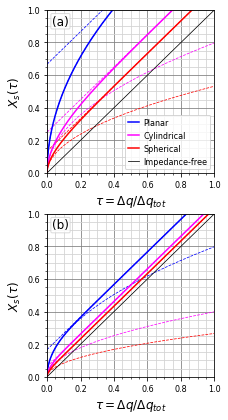

In [4]:
#Figure 2
tau_arr = np.linspace(1e-4, 1, 10000)
Q_arr = [0.5, 2]
title = ['(a)', '(b)']

fig, axs = plt.subplots(ncols = 1, nrows = 2, figsize = (3, 6.75))
plt.subplots_adjust(hspace = 0.25)

for Q in range(len(Q_arr)):
    pifunc = lambda tau: 2*np.sqrt(tau)/(1*np.sqrt(np.pi*Q_arr[Q]))
    cifunc = lambda tau: 2*np.sqrt(tau)/(2*np.sqrt(np.pi*Q_arr[Q]))
    sifunc = lambda tau: 2*np.sqrt(tau)/(3*np.sqrt(np.pi*Q_arr[Q]))

    pffunc = lambda tau: tau + 1/(1*3*Q_arr[Q])
    cffunc = lambda tau: tau + 1/(2*4*Q_arr[Q])
    sffunc = lambda tau: tau + 1/(3*5*Q_arr[Q])

    pfunc = lambda tau: tau + (1/(1*Q_arr[Q]))*(1/3 - 2*(np.sum(np.exp(-palphas*tau*Q_arr[Q])/palphas)))
    cfunc = lambda tau: tau + (1/(2*Q_arr[Q]))*(1/4 - 2*(np.sum(np.exp(-calphas*tau*Q_arr[Q])/calphas)))
    sfunc = lambda tau: tau + (1/(3*Q_arr[Q]))*(1/5 - 2*(np.sum(np.exp(-salphas*tau*Q_arr[Q])/salphas)))

    piX_sol = np.zeros(len(tau_arr))
    ciX_sol = np.zeros(len(tau_arr))
    siX_sol = np.zeros(len(tau_arr))

    pfX_sol = np.zeros(len(tau_arr))
    cfX_sol = np.zeros(len(tau_arr))
    sfX_sol = np.zeros(len(tau_arr))

    pX_sol = np.zeros(len(tau_arr))
    cX_sol = np.zeros(len(tau_arr))
    sX_sol = np.zeros(len(tau_arr))

    for i in range(len(tau_arr)):
        piX_sol[i] = pifunc(tau_arr[i])
        ciX_sol[i] = cifunc(tau_arr[i])
        siX_sol[i] = sifunc(tau_arr[i])

        pfX_sol[i] = pffunc(tau_arr[i])
        cfX_sol[i] = cffunc(tau_arr[i])
        sfX_sol[i] = sffunc(tau_arr[i])

        pX_sol[i] = pfunc(tau_arr[i])
        cX_sol[i] = cfunc(tau_arr[i])
        sX_sol[i] = sfunc(tau_arr[i])    
            
    axs[Q].plot(tau_arr, piX_sol, '--b')
    axs[Q].plot(tau_arr, ciX_sol, '--', color = 'magenta')
    axs[Q].plot(tau_arr, siX_sol, '--r')

    axs[Q].plot(tau_arr, pfX_sol, '--b')
    axs[Q].plot(tau_arr, cfX_sol, '--', color = 'magenta')
    axs[Q].plot(tau_arr, sfX_sol, '--r')
    
    axs[Q].plot(tau_arr, pX_sol, '-b', linewidth = 1.5, label="Planar")
    axs[Q].plot(tau_arr, cX_sol, '-', color = 'magenta', linewidth = 1.5, label="Cylindrical")
    axs[Q].plot(tau_arr, sX_sol, '-r', linewidth = 1.5, label="Spherical")
    
    axs[Q].plot(tau_arr, tau_arr, '-k', label="Impedance-free")
    
    axs[Q].set_xlim([0, 1])
    axs[Q].set_ylim([0, 1])
    
    axs[Q].set_xlabel('$τ=Δq/Δq_{tot}$')
    axs[Q].set_ylabel('$X_{s}(τ)$')
    
    axs[Q].annotate(title[Q], xy = (0.03, 0.97), xycoords = 'axes fraction', horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, bbox = dict(boxstyle = 'round', fc = 'w', ec = 'lightgrey', pad = 0.1, alpha = 0.8))

    axs[Q].xaxis.set_minor_locator(ticker.AutoMinorLocator())
    axs[Q].yaxis.set_minor_locator(ticker.AutoMinorLocator())
    axs[Q].grid(which = 'minor', color = 'lightgrey')
    
axs[0].legend(frameon = True, fontsize = 8)
plt.savefig('fig2.png', bbox_inches = "tight")

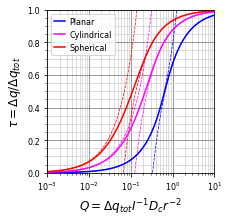

In [5]:
#Figure 3
nQ = 1000
Q_arr = np.logspace(-3, 1, nQ)

plt.figure(figsize = (3, 3))

pitau_sol = np.zeros(len(Q_arr))
citau_sol = np.zeros(len(Q_arr))
sitau_sol = np.zeros(len(Q_arr))

pftau_sol = np.zeros(len(Q_arr))
cftau_sol = np.zeros(len(Q_arr))
sftau_sol = np.zeros(len(Q_arr))

ptau_sol = np.zeros(len(Q_arr))
ctau_sol = np.zeros(len(Q_arr))
stau_sol = np.zeros(len(Q_arr))

for Q in range(len(Q_arr)):
    pifunc = lambda tau: 2*np.sqrt(tau)/(1*np.sqrt(np.pi*Q_arr[Q])) - 1
    cifunc = lambda tau: 2*np.sqrt(tau)/(2*np.sqrt(np.pi*Q_arr[Q])) - 1
    sifunc = lambda tau: 2*np.sqrt(tau)/(3*np.sqrt(np.pi*Q_arr[Q])) - 1

    pffunc = lambda tau: tau + 1/(1*3*Q_arr[Q]) - 1
    cffunc = lambda tau: tau + 1/(2*4*Q_arr[Q]) - 1
    sffunc = lambda tau: tau + 1/(3*5*Q_arr[Q]) - 1

    pfunc = lambda tau: tau + (1/(1*Q_arr[Q]))*(1/3 - 2*(np.sum(np.exp(-palphas*tau*Q_arr[Q])/palphas))) - 1
    cfunc = lambda tau: tau + (1/(2*Q_arr[Q]))*(1/4 - 2*(np.sum(np.exp(-calphas*tau*Q_arr[Q])/calphas))) - 1
    sfunc = lambda tau: tau + (1/(3*Q_arr[Q]))*(1/5 - 2*(np.sum(np.exp(-salphas*tau*Q_arr[Q])/salphas))) - 1
    
    tau_guess = 0.5
    
    pitau_sol[Q] = fsolve(pifunc, tau_guess, factor = 1.)
    citau_sol[Q] = fsolve(cifunc, tau_guess, factor = 1.)
    sitau_sol[Q] = fsolve(sifunc, tau_guess, factor = 1.)
            
    pftau_sol[Q] = fsolve(pffunc, tau_guess, factor = 1.)
    cftau_sol[Q] = fsolve(cffunc, tau_guess, factor = 1.)
    sftau_sol[Q] = fsolve(sffunc, tau_guess, factor = 1.)
    
    ptau_sol[Q] = fsolve(pfunc, tau_guess, factor = 1.)
    if ptau_sol[Q] < 0:
        ptau_sol[Q] = 0
    elif ptau_sol[Q] > pitau_sol[Q]:
        ptau_sol[Q] = pitau_sol[Q]
    ctau_sol[Q] = fsolve(cfunc, tau_guess, factor = 1.)
    if ctau_sol[Q] < 0:
        ctau_sol[Q] = 0
    elif ctau_sol[Q] > citau_sol[Q]:
        ctau_sol[Q] = citau_sol[Q]
    stau_sol[Q] = fsolve(sfunc, tau_guess, factor = 1.)
    if stau_sol[Q] < 0:
        stau_sol[Q] = 0
    elif stau_sol[Q] > sitau_sol[Q]:
        stau_sol[Q] = sitau_sol[Q]

plt.semilogx(Q_arr, pitau_sol, '--b')
plt.semilogx(Q_arr, citau_sol, '--', color = 'magenta')
plt.semilogx(Q_arr, sitau_sol, '--r')

plt.semilogx(Q_arr, pftau_sol, '--b')
plt.semilogx(Q_arr, cftau_sol, '--', color = 'magenta')
plt.semilogx(Q_arr, sftau_sol, '--r')

plt.semilogx(Q_arr, ptau_sol, '-b', linewidth = 1.5, label="Planar")
plt.semilogx(Q_arr, ctau_sol, '-', color = 'magenta', linewidth = 1.5, label="Cylindrical")
plt.semilogx(Q_arr, stau_sol, '-r', linewidth = 1.5, label="Spherical")

plt.xlim([1e-3, 1e1])
plt.ylim([0, 1])

plt.gca().xaxis.set_minor_locator(ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
plt.gca().xaxis.set_major_locator(ticker.LogLocator(numticks = 10))
plt.gca().yaxis.set_minor_locator(ticker.AutoMinorLocator())
plt.gca().grid(which = 'minor', color = 'lightgrey')

plt.xlabel('$Q=Δq_{tot}I^{-1}D_cr^{-2}$')
plt.ylabel('$τ=Δq/Δq_{tot}$')

plt.legend(fontsize = 8, frameon = True)
plt.savefig('fig3.png', bbox_inches = "tight")

C:\Users\mitch\.conda\envs\Spyder425\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\mitch\AppData\Local\Temp/ipykernel_10864/3437325201.py:46: RuntimeWarning: overflow encountered in exp
  sfunc = lambda tau: tau + (1/(3*Q_arr[Q]))*(1/5 - 2*(np.sum(np.exp(-salphas*tau*Q_arr[Q])/salphas))) + P[R]/Q_arr[Q] - 1
C:\Users\mitch\AppData\Local\Temp/ipykernel_10864/3437325201.py:46: RuntimeWarning: overflow encountered in exp
  sfunc = lambda tau: tau + (1/(3*Q_arr[Q]))*(1/5 - 2*(np.sum(np.exp(-salphas*tau*Q_arr[Q])/salphas))) + P[R]/Q_arr[Q] - 1
C:\Users\mitch\.conda\envs\Spyder425\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\mitch\AppData\Local\Temp/ipyk

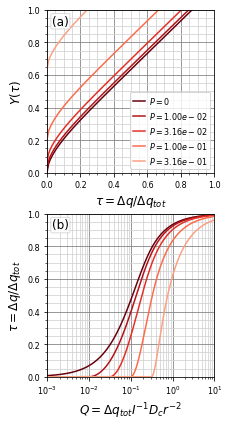

In [5]:
#Figure 4
fig, axs = plt.subplots(ncols = 1, nrows = 2, figsize = (3, 6.75))
plt.subplots_adjust(hspace = .25)

colors = plt.get_cmap('Reds_r')(np.linspace(0,1,7))
title = ['(a)', '(b)']

#Figure 4a
Q = 0.5
P = [0, np.power(10., -2.), np.power(10., -1.5), np.power(10., -1.), np.power(10., -0.5)]
tau_arr = np.linspace(0, 1, 101)
sX_sol = np.zeros(len(tau_arr))

for R in range(len(P)):
    sfunc = lambda tau: tau + (1/(3*Q))*(1/5 - 2*(np.sum(np.exp(-salphas*tau*Q)/salphas))) + P[R]/Q

    for i in range(len(tau_arr)):
        sX_sol[i] = sfunc(tau_arr[i])    
        
    if R == 0:
        label = '$P = 0$'
    else:
        label = '$P = $' + '${0:.2e}$'.format(P[R])
            
    axs[0].plot(tau_arr, sX_sol, '-', linewidth = 1.5, label = label, color = colors[R])

axs[0].set_xlim([0, 1])
axs[0].set_ylim([0, 1])

axs[0].set_xlabel('$τ=Δq/Δq_{tot}$')
axs[0].set_ylabel('$Y(τ)$')

axs[0].xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[0].yaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[0].grid(which = 'minor', color = 'lightgrey')

axs[0].annotate(title[0], xy = (0.03, 0.97), xycoords = 'axes fraction', horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, bbox = dict(boxstyle = 'round', fc = 'w', ec = 'lightgrey', pad = 0.1, alpha = 0.8))

#Figure 4b
nQ = 1000
Q_arr = np.logspace(-3, 1, nQ)
stau_sol = np.zeros(len(Q_arr))

for R in range(len(P)):
    for Q in range(len(Q_arr)):
        sfunc = lambda tau: tau + (1/(3*Q_arr[Q]))*(1/5 - 2*(np.sum(np.exp(-salphas*tau*Q_arr[Q])/salphas))) + P[R]/Q_arr[Q] - 1

        tau_guess = 0.5
        stau_sol[Q] = fsolve(sfunc, tau_guess, factor = 1.)
        if stau_sol[Q] < 0:
                stau_sol[Q] = 0

    axs[1].semilogx(Q_arr, stau_sol, '-', linewidth = 1.5, color = colors[R], label = "Spherical")
    
axs[1].set_xlim([1e-3, 1e1])
axs[1].set_ylim([0, 1])

axs[1].set_xlabel('$Q=Δq_{tot}I^{-1}D_cr^{-2}$')
axs[1].set_ylabel('$τ=Δq/Δq_{tot}$')

axs[1].xaxis.set_minor_locator(ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
axs[1].xaxis.set_major_locator(ticker.LogLocator(numticks = 10))
axs[1].yaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[1].grid(which = 'minor', color = 'lightgrey')

axs[0].legend(fontsize = 8, frameon = True)

axs[1].annotate(title[1], xy = (0.03, 0.97), xycoords = 'axes fraction', horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, bbox = dict(boxstyle = 'round', fc = 'w', ec = 'lightgrey', pad = 0.1, alpha = 0.8))

plt.savefig('fig4.png', bbox_inches = "tight")

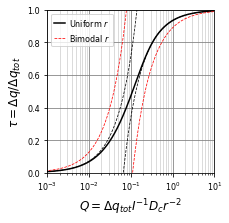

In [6]:
#Figure 5
nQ = 1000
P = 0.0

Q_arr = np.logspace(-4, 2, nQ)

plt.figure(figsize = (3, 3))

sitau_sol = np.zeros(len(Q_arr))
sivtau_sol = np.zeros(len(Q_arr))
sftau_sol = np.zeros(len(Q_arr))
sfvtau_sol = np.zeros(len(Q_arr))
stau_sol = np.zeros(len(Q_arr))

Qshifti = 0.75
Qshiftf = 1.667

for Q in range(len(Q_arr)):
    sifunc = lambda tau: 2*np.sqrt(tau)/(3*np.sqrt(np.pi*Q_arr[Q])) + P/Q_arr[Q] - 1
    sivfunc = lambda tau: Qshifti*2*np.sqrt(tau)/(3*np.sqrt(np.pi*Q_arr[Q])) + P/Q_arr[Q] - 1
    sffunc = lambda tau: tau + 1/(3*5*Q_arr[Q]) + P/Q_arr[Q] - 1
    sfvfunc = lambda tau: tau + Qshiftf*1/(3*5*Q_arr[Q]) + P/Q_arr[Q] - 1
    sfunc = lambda tau: tau + (1/(3*Q_arr[Q]))*(1/5 - 2*(np.sum(np.exp(-salphas*tau*Q_arr[Q])/salphas))) + P/Q_arr[Q] - 1
    
    tau_guess = 0.5
    
    sitau_sol[Q] = fsolve(sifunc, tau_guess, factor = 1.)
    sivtau_sol[Q] = fsolve(sivfunc, tau_guess, factor = 1.)
    sftau_sol[Q] = fsolve(sffunc, tau_guess, factor = 1.)
    sfvtau_sol[Q] = fsolve(sfvfunc, tau_guess, factor = 1.)
    stau_sol[Q] = fsolve(sfunc, tau_guess, factor = 1.)
    if stau_sol[Q] < 0:
        stau_sol[Q] = 0

plt.semilogx(Q_arr, stau_sol, '-k', linewidth = 1.5, label = 'Uniform $r$')
plt.semilogx(Q_arr, sitau_sol, '--k')
plt.semilogx(Q_arr, sivtau_sol, '--r', label = 'Bimodal $r$')
plt.semilogx(Q_arr, sftau_sol, '--k')
plt.semilogx(Q_arr, sfvtau_sol, '--r')

plt.xlim([1e-3, 1e1])
plt.ylim([0, 1])

plt.xlabel('$Q=Δq_{tot}I^{-1}D_cr^{-2}$')
plt.ylabel('$τ=Δq/Δq_{tot}$')

plt.legend(fontsize = 8, frameon = True)
    
plt.grid(which = 'minor', color = 'lightgrey')

plt.savefig('fig5.png', bbox_inches = 'tight')

C:\Users\mitch\.conda\envs\Spyder425\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


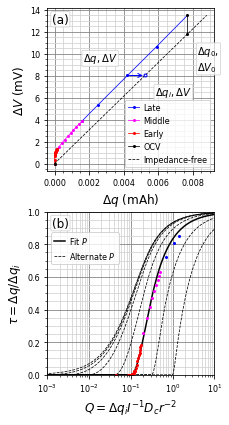

In [7]:
# Figure 6
path = 'C:/Users/mitch/Lab/Atlung Modeling/AMIDR/Analyzed Data/270/270 NM9505 30C Discharge/270 NM9505 30C Discharge Parsed.xlsx'
mass = 2.157
nQ = 1000
A = 3
B = 5             
        
fig, axs = plt.subplots(ncols = 1, nrows = 2, figsize=(3, 6.75))
plt.subplots_adjust(hspace = .25)

df = pd.read_excel(Path(path), sheet_name = '3.714 V - 3.702 V')

df['Capacity'] = df['Specific Capacity']*mass/1000

qdata = [0]
Vdata = [0]
qdata0 = [(0.000287018-0.000279317)*1000, (0.000287018-0.000279317)*1000]
Vdata0 = [(3.404618422-3.3911185)*1000, (3.404618422-3.392830204)*1000]
qdata00 = [0, qdata0[1], Vdata0[0]/Vdata0[1]*qdata0[1]]
Vdata00 = [0, Vdata0[1], Vdata0[0]]

qdata1 = pd.concat([pd.Series([0]), df[:28]['Capacity']])
Vdata1 = pd.concat([pd.Series([0]), df[:28]['Voltage']])*1000

qdata2 = df[27:37]['Capacity']
Vdata2 = df[27:37]['Voltage']*1000

qdata3 = df[36:]['Capacity']
Vdata3 = df[36:]['Voltage']*1000

axs[0].plot([qdata3[39], qdata0[0]], [Vdata3[39], Vdata0[0]], 'b-')
axs[0].plot(qdata3, Vdata3, 'ob-', label = 'Late', markersize = 2)
axs[0].plot(qdata2, Vdata2, 'o-', color = 'magenta', label = 'Middle', markersize = 2)
axs[0].plot(qdata1, Vdata1, 'or-', label = 'Early', markersize = 2)
axs[0].plot(qdata0, Vdata0, 'ok-', label = 'OCV', markersize = 2)
axs[0].plot(qdata00, Vdata00, '--k', label = 'Impedance-free')
axs[0].plot(qdata, Vdata, 'ok', markersize = 2)
axs[0].plot(df[38:39]['Voltage']*1000/Vdata00[1]*qdata00[1], df[38:39]['Voltage']*1000, 'ob', markersize = 3, fillstyle = 'none')

axs[0].set_xlabel('$Δq$ (mAh)')
axs[0].set_ylabel('$ΔV$ (mV)')

axs[0].xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[0].yaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[0].grid(which = 'minor', color = 'lightgrey')

axs[0].legend(fontsize = 8, frameon = True)

axs[0].annotate('', xy=(df[38:39]['Voltage']*1000/Vdata00[1]*qdata00[1], df[38:39]['Voltage']*1000), xycoords = 'data',
            xytext=(df[38:39]['Capacity'], df[38:39]['Voltage']*1000),
            arrowprops=dict(arrowstyle = '->', color = 'b'))
axs[0].annotate('$Δq, ΔV$', xy=(df[38:39]['Capacity'], df[38:39]['Voltage']*1000), xytext = (-10, 10), textcoords = 'offset pixels', ha = 'right', va = 'bottom', fontsize = 10, bbox = dict(boxstyle = 'round', fc = 'w', ec = 'lightgrey', pad = 0.1, alpha = 0.8))
axs[0].annotate('$Δq_i, ΔV$', xy=(df[38:39]['Voltage']*1000/Vdata00[1]*qdata00[1], df[38:39]['Voltage']*1000), xytext = (10, -10), textcoords = 'offset pixels', ha = 'left', va = 'top', fontsize = 10, bbox = dict(boxstyle = 'round', fc = 'w', ec = 'lightgrey', pad = 0.1, alpha = 0.8))
axs[0].annotate('$Δq_0,$\n$ΔV_0$', xy=(qdata00[1], Vdata00[1]), xytext = (10, -10), textcoords = 'offset pixels', ha = 'left', va = 'top', fontsize = 10, bbox = dict(boxstyle = 'round', fc = 'w', ec = 'lightgrey', pad = 0.1, alpha = 0.8))

axs[0].annotate('(a)', xy = (0.03, 0.97), xycoords = 'axes fraction', horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, bbox = dict(boxstyle = 'round', fc = 'w', ec = 'lightgrey', pad = 0.1, alpha = 0.8))


D = 5.9547E-12
r = 1.318e-4

Qdata1 = 3600*df[:28]['qi/I']*D/r**2
taudata1 = df[:28]['Fractional Capacity']

Qdata2 = 3600*df[28:37]['qi/I']*D/r**2
taudata2 = df[28:37]['Fractional Capacity']

Qdata3 = 3600*df[37:]['qi/I']*D/r**2
taudata3 = df[37:]['Fractional Capacity']

R_Ohm = np.array([0, 1e-3, 3.1622e-3, 1e-2, 4.1622e-2, .1028, 3.1622e-1, 1])
for i in range(len(R_Ohm)):
    Q_arr = np.logspace(-4, 2, nQ)
    tau_sol = np.zeros(nQ)
    tau_guess = 0.5
    for j in range(nQ):
        Q = Q_arr[j]
        func = lambda tau: tau - 1 + (1/(A*Q))*(1/B - 2*(np.sum(np.exp(-salphas*tau*Q)/salphas))) + R_Ohm[i]/Q if R_Ohm[i]<Q else tau 
        tau_sol[j] = fsolve(func, tau_guess, factor = 1.)
        if tau_sol[j] < 0:
            tau_sol[j] = 0

    if R_Ohm[i] == .1028: 
        plt.semilogx(Q_arr, tau_sol, '-k', linewidth = 1.5, label = 'Fit $P$')
    else:
        plt.semilogx(Q_arr, tau_sol, '--k')
    
plt.semilogx(0, 0, '--k', label = 'Alternate $P$')
    
axs[1].semilogx(Qdata1, taudata1, 'or', markersize = 2)
axs[1].semilogx(Qdata2, taudata2, 'o', color = 'magenta', markersize = 2)
axs[1].semilogx(Qdata3, taudata3, 'ob', markersize = 2)

axs[1].set_xlabel('$Q=Δq_iI^{-1}D_cr^{-2}$')
axs[1].set_ylabel('$τ=Δq/Δq_i$')

axs[1].set_xlim([1e-3, 1e1])
axs[1].set_ylim([0, 1])

axs[1].xaxis.set_minor_locator(ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
axs[1].xaxis.set_major_locator(ticker.LogLocator(numticks = 10))
axs[1].yaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[1].grid(which = 'minor', color = 'lightgrey')

axs[1].annotate('(b)', xy = (0.03, 0.97), xycoords = 'axes fraction', horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, bbox = dict(boxstyle = 'round', fc = 'w', ec = 'lightgrey', pad = 0.1, alpha = 0.8))

axs[1].legend(fontsize = 8, frameon = True, loc = 'upper left', bbox_to_anchor = (0.0, 0.9))

plt.savefig('fig6.png', bbox_inches="tight")

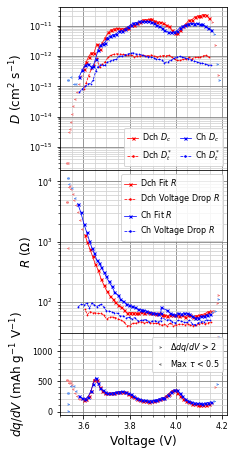

In [18]:
#Figure 7
path = 'C:/Users/Mitch/Lab/Atlung Modeling/AMIDR/Analyzed Data'
cells = ['270']
mincap = 0.5
maxdqdVchange = 2

fig, axs = plt.subplots(ncols = 1, nrows = 3, figsize = (3, 7.5), sharex = 'col',
gridspec_kw = {'height_ratios': [2, 2, 1], 'hspace': 0.0})

# Find and read file data into dataframes
for cell in cells:
    cellpath = Path(path) / cell
    for halfcyclepath in sorted(cellpath.iterdir(), reverse = True):
        if halfcyclepath.is_dir():
            for fitfile in halfcyclepath.iterdir():
                if fitfile.is_file() and "harge Fitted" in str(fitfile):
                    if "Discharge Fitted" in str(fitfile):
                        halfcycle = 'Discharge'
                    elif "Charge Fitted" in str(fitfile):
                        halfcycle = 'Charge'
                    dfnew = pd.read_excel(fitfile)

                    # Remove datapoints where 
                    # dq/dV change between subsequent datapoint is greater than the max dqdV factor or
                    # the capacity span is less the minimum capacity span.
                    baddqdv = ~(((dfnew/dfnew.set_index(dfnew.index + 1))['dq/dV (mAh/gV)'] < maxdqdVchange) & \
                                ((dfnew/dfnew.set_index(dfnew.index + 1))['dq/dV (mAh/gV)'] > 0) & \
                                ((dfnew/dfnew.set_index(dfnew.index - 1))['dq/dV (mAh/gV)'] < maxdqdVchange) & \
                                ((dfnew/dfnew.set_index(dfnew.index - 1))['dq/dV (mAh/gV)'] > 0) & \
                                ((dfnew.set_index(dfnew.index + 1)/dfnew)['dq/dV (mAh/gV)'] < maxdqdVchange) & \
                                ((dfnew.set_index(dfnew.index + 1)/dfnew)['dq/dV (mAh/gV)'] > 0) & \
                                ((dfnew.set_index(dfnew.index - 1)/dfnew)['dq/dV (mAh/gV)'] < maxdqdVchange) & \
                                ((dfnew.set_index(dfnew.index - 1)/dfnew)['dq/dV (mAh/gV)'] > 0))[1:-1]
                    badcapspan = dfnew['Cap Span'] < mincap
                    keep = ~(baddqdv|badcapspan)

                    # Settings
                    if halfcycle == 'Discharge':
                        markerA = 'rx-'
                        markerB = 'r.--'
                        color = 'lightcoral'
                    elif halfcycle == 'Charge':
                        markerA = 'bx-'
                        markerB = 'b.--'
                        color = 'cornflowerblue'
                    else:
                        markerA = 'kx-'
                        markerB = 'k.--'
                        color = 'grey'
                    
                    # Plot individual cells with outliers removed
                    axs[0].semilogy(dfnew[keep]['Voltage (V)'], dfnew[keep]['Dc (cm^2/s)'], markerA)
                    axs[0].semilogy(dfnew[keep]['Voltage (V)'], dfnew[keep]['Dt* (cm^2/s)'], markerB, markersize = 1.5)                            
                    axs[1].semilogy(dfnew[keep]['Initial Voltage (V)'], dfnew[keep]['Rfit (Ohm)'], markerA)
                    axs[1].semilogy(dfnew[keep]['Initial Voltage (V)'], dfnew[keep]['Rdrop (Ohm)'], markerB, markersize = 1.5)
                    axs[2].plot(dfnew[keep]['Voltage (V)'], dfnew[keep]['dq/dV (mAh/gV)'], markerA)

                    # Plot individual cell outliers (dqdv)
                    axs[0].semilogy(dfnew[baddqdv]['Voltage (V)'], dfnew[baddqdv]['Dc (cm^2/s)'], marker = '4', color = color, linestyle = 'None')
                    #axs[0].semilogy(dfnew[baddqdv]['Voltage (V)'], dfnew[baddqdv]['Dt* (cm^2/s)'], marker = '4', color = color, linestyle = 'None')                            
                    axs[1].semilogy(dfnew[baddqdv]['Initial Voltage (V)'], dfnew[baddqdv]['Rfit (Ohm)'], marker = '4', color = color, linestyle = 'None')                       
                    #axs[1].semilogy(dfnew[baddqdv]['Initial Voltage (V)'], dfnew[baddqdv]['Rdrop (Ohm)'], marker = '4', color = color, linestyle = 'None')
                    axs[2].plot(dfnew[baddqdv]['Voltage (V)'], dfnew[baddqdv]['dq/dV (mAh/gV)'], marker = '4', color = color, linestyle = 'None')

                    # Plot individual cell outliers (capspan)
                    axs[0].semilogy(dfnew[badcapspan]['Voltage (V)'], dfnew[badcapspan]['Dc (cm^2/s)'], marker = '3', color = color, linestyle = 'None')
                    #axs[0].semilogy(dfnew[badcapspan]['Voltage (V)'], dfnew[badcapspan]['Dt* (cm^2/s)'], marker = '3', color = color, linestyle = 'None')                            
                    axs[1].semilogy(dfnew[badcapspan]['Initial Voltage (V)'], dfnew[badcapspan]['Rfit (Ohm)'], marker = '3', color = color, linestyle = 'None')                      
                    #axs[1].semilogy(dfnew[badcapspan]['Initial Voltage (V)'], dfnew[badcapspan]['Rdrop (Ohm)'], marker = '3', color = color, linestyle = 'None')
                    axs[2].plot(dfnew[badcapspan]['Voltage (V)'], dfnew[badcapspan]['dq/dV (mAh/gV)'], marker = '3', color = color, linestyle = 'None')

axs[0].set_ylabel('$D$ (cm$\mathregular{^{2}\ s^{-1}}$)')
axs[1].set_ylabel('$R$ (Ω)')
axs[2].set_xlabel('Voltage (V)')
axs[2].set_ylabel('$dq/dV$ (mAh g$\mathregular{^{-1}\ V^{-1}}$)')
#axs[1].set_xlabel('x in Li$\mathregular{_{x}N_{0.95}Mn_{0.05}O_{2}}$')

axs[0].semilogy([], [], 'rx-', label = 'Dch $D_{c}$')
axs[0].semilogy([], [], 'r.--', label = 'Dch $D_{t}^{*}$')
axs[0].semilogy([], [], 'bx-', label = 'Ch $D_{c}$')
axs[0].semilogy([], [], 'b.--', label = 'Ch $D_{t}^{*}$')
axs[0].legend(frameon = True, ncol = 2)

axs[1].semilogy([], [], 'rx-', label = 'Dch Fit $R$')
axs[1].semilogy([], [], 'r.--', label = 'Dch Voltage Drop $R$')
axs[1].semilogy([], [], 'bx-', label = 'Ch Fit $R$')
axs[1].semilogy([], [], 'b.--', label = 'Ch Voltage Drop $R$')
axs[1].legend(frameon = True)

axs[2].plot([], [], marker = '4', color = 'grey', linestyle = 'None', label = '$Δdq/dV$ > ' + str(maxdqdVchange))
axs[2].plot([], [], marker = '3', color = 'grey', linestyle = 'None', label = 'Max $τ$ < '  + str(mincap))
axs[2].legend(frameon = True, loc = 'upper right')

axs[0].xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[0].yaxis.set_minor_locator(ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
axs[0].yaxis.set_major_locator(ticker.LogLocator(numticks = 10))
axs[1].yaxis.set_minor_locator(ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
axs[1].yaxis.set_major_locator(ticker.LogLocator(numticks = 10))
axs[2].yaxis.set_minor_locator(ticker.AutoMinorLocator())

axs[0].grid(which = 'minor', color = 'lightgrey')
axs[1].grid(which = 'minor', color = 'lightgrey')
axs[2].grid(which = 'minor', color = 'lightgrey')

plt.savefig('fig7.png', bbox_inches = 'tight')

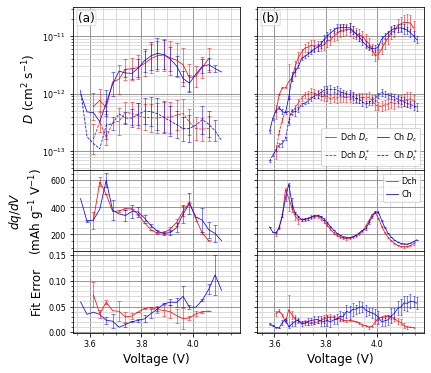

In [40]:
# Figure 8
path = 'C:/Users/Mitch/Lab/Atlung Modeling/AMIDR/Analyzed Data'
mats = ['NM9505 30C Old', 'NM9505 30C']
binfiles = ['NM9505 30C Old (215, 217).xlsx', 'NM9505 30C (266, 269, 270).xlsx']

title = ['(a)', '(b)']

dfD = [pd.read_excel(Path(path) / mats[0] / binfiles[0], sheet_name = 'Discharge'), pd.read_excel(Path(path) / mats[1] / binfiles[1], sheet_name = 'Discharge')]
dfC = [pd.read_excel(Path(path) / mats[0] / binfiles[0], sheet_name = 'Charge'), pd.read_excel(Path(path) / mats[1] / binfiles[1], sheet_name = 'Charge')]

fig, axs = plt.subplots(ncols = 2, nrows = 3, figsize = (6.3, 6), sharex = True, sharey = 'row',
gridspec_kw = {'height_ratios': [2,1,1], 'hspace': 0.0, 'width_ratios': [1,1], 'wspace': 0.1})

axs[0, 1].semilogy([], [], 'r-', label = 'Dch $D_{c}$')
axs[0, 1].semilogy([], [], 'r--', label = 'Dch $D_{t}^{*}$')
axs[0, 1].semilogy([], [], 'b-', label = 'Ch $D_{c}$')
axs[0, 1].semilogy([], [], 'b--', label = 'Ch $D_{t}^{*}$')
axs[0, 1].legend(frameon = True, ncol = 2)

axs[1, 1].plot([], [], 'r-', label = 'Dch')
axs[1, 1].plot([], [], 'b-', label = 'Ch')
axs[1, 1].legend(frameon = True)

for i in range(len(dfD)):
    yerrDDc = [dfD[i]['Dc (cm^2/s)']*(1 - 1/dfD[i]['Dc geoSTD']), dfD[i]['Dc (cm^2/s)']*(dfD[i]['Dc geoSTD'] - 1)]
    yerrDDt = [dfD[i]['Dt* (cm^2/s)']*(1 - 1/dfD[i]['Dt* geoSTD']), dfD[i]['Dt* (cm^2/s)']*(dfD[i]['Dt* geoSTD'] - 1)]
    axs[0, i].errorbar(dfD[i]['Voltage (V)'], dfD[i]['Dc (cm^2/s)'], yerr = yerrDDc, fmt = 'r-', elinewidth = 0.5, markeredgewidth = 0.5, capsize = 2 - i)
    axs[0, i].errorbar(dfD[i]['Voltage (V)'], dfD[i]['Dt* (cm^2/s)'], yerr = yerrDDt, fmt = 'r--', elinewidth = 0.5, markeredgewidth = 0.5, capsize = 2 - i)

    yerrCDc = [dfC[i]['Dc (cm^2/s)']*(1 - 1/dfC[i]['Dc geoSTD']), dfC[i]['Dc (cm^2/s)']*(dfC[i]['Dc geoSTD'] - 1)]
    yerrCDt = [dfC[i]['Dt* (cm^2/s)']*(1 - 1/dfC[i]['Dt* geoSTD']), dfC[i]['Dt* (cm^2/s)']*(dfC[i]['Dt* geoSTD'] - 1)]
    axs[0, i].errorbar(dfC[i]['Voltage (V)'], dfC[i]['Dc (cm^2/s)'], yerr = yerrCDc, fmt = 'b-', elinewidth = 0.5, markeredgewidth = 0.5, capsize = 2 - i)
    axs[0, i].errorbar(dfC[i]['Voltage (V)'], dfC[i]['Dt* (cm^2/s)'], yerr = yerrCDt, fmt = 'b--', elinewidth = 0.5, markeredgewidth = 0.5, capsize = 2 - i)
    
    axs[1, i].errorbar(dfD[i]['Voltage (V)'], dfD[i]['dq/dV (mAh/gV)'], yerr = dfD[i]['dq/dV STD'], fmt = 'r-', elinewidth = 0.5, markeredgewidth = 0.5, capsize = 2 - i)
    
    axs[1, i].errorbar(dfC[i]['Voltage (V)'], dfC[i]['dq/dV (mAh/gV)'], yerr = dfC[i]['dq/dV STD'], fmt = 'b-', elinewidth = 0.5, markeredgewidth = 0.5, capsize = 2 - i)

    axs[2, i].errorbar(dfD[i]['Voltage (V)'], dfD[i]['Fit Error'], yerr = dfD[i]['Fit Error STD'], fmt = 'r-', elinewidth = 0.5, markeredgewidth = 0.5, capsize = 2 - i)
    
    axs[2, i].errorbar(dfC[i]['Voltage (V)'], dfC[i]['Fit Error'], yerr = dfC[i]['Fit Error STD'], fmt = 'b-', elinewidth = 0.5, markeredgewidth = 0.5, capsize = 2 - i)

axs[0, 0].set_ylabel('$D$ (cm$\mathregular{^{2}\ s^{-1}}$)')
#axs[0, 1].set_ylabel('D (cm$\mathregular{^{2}}$/s)')
axs[1, 0].set_ylabel('$dq/dV$\n(mAh g$\mathregular{^{-1}\ V^{-1}}$)')
#axs[1, 1].set_ylabel('dq/dV \n (mAh/gV)')
axs[2, 0].set_ylabel('Fit Error')
#axs[2, 1].set_ylabel('Fit Error')
axs[2, 0].set_xlabel('Voltage (V)')
axs[2, 1].set_xlabel('Voltage (V)')

axs[0, 0].xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[0, 0].yaxis.set_minor_locator(ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
axs[0, 0].yaxis.set_major_locator(ticker.LogLocator(numticks = 10))
axs[0, 1].xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[1, 0].yaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[2, 0].yaxis.set_minor_locator(ticker.AutoMinorLocator())

for t in axs[0,1].get_yticklabels():
    t.set_visible(True) 

axs[0, 0].grid(which = 'minor', color = 'lightgrey')
axs[1, 0].grid(which = 'minor', color = 'lightgrey')
axs[2, 0].grid(which = 'minor', color = 'lightgrey')
axs[0, 1].grid(which = 'minor', color = 'lightgrey')
axs[1, 1].grid(which = 'minor', color = 'lightgrey')
axs[2, 1].grid(which = 'minor', color = 'lightgrey')

axs[0, 0].annotate(title[0], xy = (0.03, 0.97), xycoords = 'axes fraction', horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, bbox = dict(boxstyle = 'round', fc = 'w', ec = 'lightgrey', pad = 0.1, alpha = 0.8))
axs[0, 1].annotate(title[1], xy = (0.03, 0.97), xycoords = 'axes fraction', horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, bbox = dict(boxstyle = 'round', fc = 'w', ec = 'lightgrey', pad = 0.1, alpha = 0.8))

plt.savefig('fig8.png', bbox_inches = 'tight')

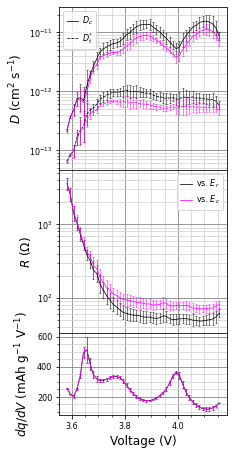

In [22]:
#Figure 9
path = 'C:/Users/Mitch/Lab/Atlung Modeling/AMIDR/Analyzed Data'
mats = ['NM9505 30C', 'NM9505 30C-2e']
binfiles = ['NM9505 30C (266, 269, 270).xlsx', 'NM9505 30C-2e (266, 269, 270).xlsx']

df = [pd.read_excel(Path(path) / mats[0] / binfiles[0], sheet_name = 'All'), pd.read_excel(Path(path) / mats[1] / binfiles[1], sheet_name = 'All')]

fig, axs = plt.subplots(ncols = 1, nrows = 3, figsize = (3, 7.5), sharex = 'col',
gridspec_kw = {'height_ratios': [2, 2, 1], 'hspace': 0.0})

axs[0].semilogy([], [], 'k-', label = '$D_{c}$')
axs[0].semilogy([], [], 'k--', label = '$D_{t}^{*}$')
axs[0].legend(frameon = True)

axs[1].semilogy([], [], 'k-', label = 'vs. $E_{r}$')
axs[1].semilogy([], [], '-', color = 'magenta', label = 'vs. $E_{c}$')
axs[1].legend(frameon = True)

color = ['k', 'magenta']
for i in range(len(df)):
    yerrDc = [df[i]['Dc (cm^2/s)']*(1 - 1/df[i]['Dc geoSTD']), df[i]['Dc (cm^2/s)']*(df[i]['Dc geoSTD'] - 1)]
    yerrDt = [df[i]['Dt* (cm^2/s)']*(1 - 1/df[i]['Dt* geoSTD']), df[i]['Dt* (cm^2/s)']*(df[i]['Dt* geoSTD'] - 1)]
    axs[0].errorbar(df[i]['Voltage (V)'], df[i]['Dc (cm^2/s)'], yerr = yerrDc, fmt = '-', color = color[i], elinewidth = 0.5, markeredgewidth = 0.5, capsize = 1)
    axs[0].errorbar(df[i]['Voltage (V)'], df[i]['Dt* (cm^2/s)'], yerr = yerrDt, fmt = '--', color = color[i], elinewidth = 0.5, markeredgewidth = 0.5, capsize = 1)
    
    yerrR = [df[i]['Rfit (Ohm)']*(1 - 1/df[i]['Rfit geoSTD']), df[i]['Rfit (Ohm)']*(df[i]['Rfit geoSTD'] - 1)]
    axs[1].errorbar(df[i]['Voltage (V)'], df[i]['Rfit (Ohm)'], yerr = yerrR, fmt = '-', color = color[i], elinewidth = 0.5, markeredgewidth = 0.5, capsize = 1)
    
    axs[2].errorbar(df[i]['Voltage (V)'], df[i]['dq/dV (mAh/gV)'], yerr = df[i]['dq/dV STD'], fmt = '-', color = color[i], elinewidth = 0.5, markeredgewidth = 0.5, capsize = 1)
    
axs[0].set_ylabel('$D$ (cm$\mathregular{^{2}\ s^{-1}}$)')
axs[1].set_ylabel('$R$ (Ω)')
axs[2].set_ylabel('$dq/dV$ (mAh g$\mathregular{^{-1}\ V^{-1}}$)')
axs[2].set_xlabel('Voltage (V)')

axs[0].xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[0].yaxis.set_minor_locator(ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
axs[0].yaxis.set_major_locator(ticker.LogLocator(numticks = 10))
axs[1].yaxis.set_minor_locator(ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
axs[1].yaxis.set_major_locator(ticker.LogLocator(numticks = 10))
axs[2].yaxis.set_minor_locator(ticker.AutoMinorLocator())

axs[0].grid(which = 'minor', color = 'lightgrey')
axs[1].grid(which = 'minor', color = 'lightgrey')
axs[2].grid(which = 'minor', color = 'lightgrey')

plt.savefig('fig9.png', bbox_inches = 'tight')

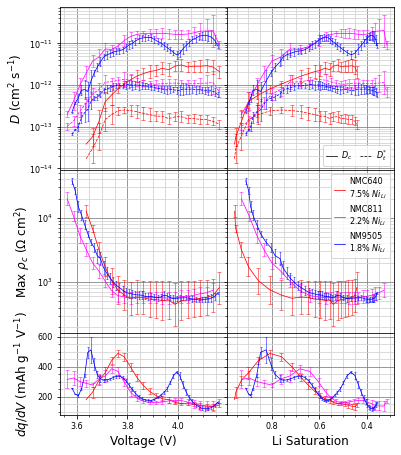

In [38]:
#Figure 10

path = 'C:/Users/Mitch/Lab/Atlung Modeling/AMIDR/Analyzed Data'
mats = ['NMC640 30C', 'NMC811 30C', 'NM9505 30C']
matname = 'NM9505 30C'

folder = Path(path)
        
# Generate plot for individual cells
fig, axs = plt.subplots(ncols = 2, nrows = 3, figsize = (6, 7.5), sharex = 'col', sharey = 'row', 
gridspec_kw = {'height_ratios': [2, 2, 1], 'hspace': 0.0, 'width_ratios': [1, 1], 'wspace': 0.0})

axs[0, 1].semilogy([], [], 'k-', label = '$D_{c}$')
axs[0, 1].semilogy([], [], 'k--', label = '$D_{t}^{*}$')
axs[0, 1].legend(frameon = True, ncol = 2, loc = 'lower right')

axs[0, 0].set_ylabel('$D$ (cm$\mathregular{^{2}\ s^{-1}}$)')
axs[1, 0].set_ylabel('Max $ρ_{c}$ (Ω cm$\mathregular{^{2}}$)')
axs[2, 0].set_ylabel('$dq/dV$ (mAh g$\mathregular{^{-1}\ V^{-1}}$)')
axs[2, 0].set_xlabel('Voltage (V)')
axs[2, 1].set_xlabel('Li Saturation')

axs[0, 1].invert_xaxis()

axs[0, 0].xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[0, 0].yaxis.set_minor_locator(ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
axs[0, 0].yaxis.set_major_locator(ticker.LogLocator(numticks = 10))
axs[0, 1].xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[1, 0].yaxis.set_minor_locator(ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
axs[1, 0].yaxis.set_major_locator(ticker.LogLocator(numticks = 10))
axs[2, 0].yaxis.set_minor_locator(ticker.AutoMinorLocator())


axs[0, 0].grid(which = 'minor', color = 'lightgrey')
axs[1, 0].grid(which = 'minor', color = 'lightgrey')
axs[0, 1].grid(which = 'minor', color = 'lightgrey')
axs[1, 1].grid(which = 'minor', color = 'lightgrey') 
axs[2, 0].grid(which = 'minor', color = 'lightgrey') 
axs[2, 1].grid(which = 'minor', color = 'lightgrey') 

colors = ['r', 'magenta', 'b', 'k']

labels = ['NMC640\n7.5% $Ni_{Li}$', 'NMC811\n2.2% $Ni_{Li}$', 'NM9505\n1.8% $Ni_{Li}$']

# Find and read file data into dataframes
i = 0
for mat in mats:
    matpath = folder / mat
    for filepath in matpath.iterdir():
        if mat + ' (' in str(filepath):
            df = pd.read_excel(filepath, sheet_name = 'All')

            if '95' in str(filepath):
                capsize = 1
            else:
                capsize = 2
            
            # Plot dataframe
            yerrDc = [df['Dc (cm^2/s)']*(1 - 1/df['Dc geoSTD']), df['Dc (cm^2/s)']*(df['Dc geoSTD'] - 1)]
            yerrDt = [df['Dt* (cm^2/s)']*(1 - 1/df['Dt* geoSTD']), df['Dt* (cm^2/s)']*(df['Dt* geoSTD'] - 1)]
            axs[0, 0].errorbar(df['Voltage (V)'], df['Dc (cm^2/s)'], yerr = yerrDc, fmt = '-', color = colors[i], elinewidth = 0.5, markeredgewidth = 0.5, capsize = capsize)
            axs[0, 0].errorbar(df['Voltage (V)'], df['Dt* (cm^2/s)'], yerr = yerrDt, fmt = '--', color = colors[i], elinewidth = 0.5, markeredgewidth = 0.5, capsize = capsize)
            axs[0, 1].errorbar(df['SOC'], df['Dc (cm^2/s)'], yerr = yerrDc, fmt = '-', color = colors[i], elinewidth = 0.5, markeredgewidth = 0.5, capsize = capsize)
            axs[0, 1].errorbar(df['SOC'], df['Dt* (cm^2/s)'], yerr = yerrDt, fmt = '--', color = colors[i], elinewidth = 0.5, markeredgewidth = 0.5, capsize = capsize)
            yerrmicR = [df['micR (Ohmcm^2)']*(1 - 1/df['micR geoSTD']), df['micR (Ohmcm^2)']*(df['micR geoSTD'] - 1)]
            axs[1, 0].errorbar(df['Voltage (V)'], df['micR (Ohmcm^2)'], yerr = yerrmicR, fmt = '-', color = colors[i], elinewidth = 0.5, markeredgewidth = 0.5, capsize = capsize)
            axs[1, 1].errorbar(df['SOC'], df['micR (Ohmcm^2)'], yerr = yerrmicR, fmt = '-', color = colors[i], elinewidth = 0.5, markeredgewidth = 0.5, capsize = capsize)
            axs[1, 1].semilogy([], [], color = colors[i], label = labels[i])
            axs[2, 0].errorbar(df['Voltage (V)'], df['dq/dV (mAh/gV)'], yerr = df['dq/dV STD'], fmt = '-', color = colors[i], elinewidth = 0.5, markeredgewidth = 0.5, capsize = capsize)
            axs[2, 1].errorbar(df['SOC'], df['dq/dV (mAh/gV)'], yerr = df['dq/dV STD'], fmt = '-', color = colors[i], elinewidth = 0.5, markeredgewidth = 0.5, capsize = capsize)
            
            i = i + 1

axs[1, 1].legend(frameon = True)       

plt.savefig('fig10.png', bbox_inches = 'tight')

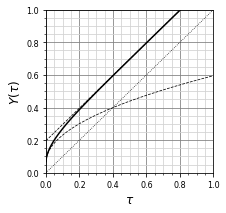

In [13]:
#Figure C1
tau_arr = np.linspace(1e-4, 1, 10000)
Q = 0.5
#Q = 0.25
P = np.power(10., -1.5)
#P = 0

fig, axs = plt.subplots(ncols = 1, nrows = 1, figsize = (3, 3))

sifunc = lambda tau: 2*np.sqrt(tau)/(3*np.sqrt(np.pi*Q)) + P/Q

sffunc = lambda tau: tau + 1/(3*5*Q) + P/Q

sfunc = lambda tau: tau + (1/(3*Q))*(1/5 - 2*(np.sum(np.exp(-salphas*tau*Q)/salphas))) + P/Q

siX_sol = np.zeros(len(tau_arr))

sfX_sol = np.zeros(len(tau_arr))

sX_sol = np.zeros(len(tau_arr))

for i in range(len(tau_arr)):
    siX_sol[i] = sifunc(tau_arr[i])

    sfX_sol[i] = sffunc(tau_arr[i])

    sX_sol[i] = sfunc(tau_arr[i])    

axs.plot(tau_arr, siX_sol, '--k')

axs.plot(tau_arr, sfX_sol, '--k')

axs.plot(tau_arr, sX_sol, '-k', linewidth = 1.5)

axs.plot(tau_arr, tau_arr, ':k')

axs.set_xlim([0, 1])
axs.set_ylim([0, 1])

axs.set_xlabel('$τ$')
axs.set_ylabel('$Y(τ)$')
#axs.set_ylabel('$X_s(τ)$')

axs.xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs.yaxis.set_minor_locator(ticker.AutoMinorLocator())
axs.grid(which = 'minor', color = 'lightgrey')
    
plt.savefig('figC1.png', bbox_inches = "tight")

C:\Users\mitch\AppData\Local\Temp/ipykernel_10864/2933454233.py:15: RuntimeWarning: invalid value encountered in sqrt
  sifunc = lambda tau: 2*np.sqrt(tau)/(3*np.sqrt(np.pi*Q_arr[Q])) + P/Q_arr[Q] - 1
C:\Users\mitch\.conda\envs\Spyder425\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\mitch\AppData\Local\Temp/ipykernel_10864/2933454233.py:19: RuntimeWarning: overflow encountered in exp
  sfunc = lambda tau: tau + (1/(3*Q_arr[Q]))*(1/5 - 2*(np.sum(np.exp(-salphas*tau*Q_arr[Q])/salphas))) + P/Q_arr[Q] - 1


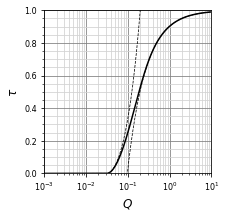

In [14]:
#Figure C2
nQ = 1000
Q_arr = np.logspace(-3, 1, nQ)
P = np.power(10., -1.5)

plt.figure(figsize = (3, 3))

sitau_sol = np.zeros(len(Q_arr))

sftau_sol = np.zeros(len(Q_arr))

stau_sol = np.zeros(len(Q_arr))

for Q in range(len(Q_arr)):
    sifunc = lambda tau: 2*np.sqrt(tau)/(3*np.sqrt(np.pi*Q_arr[Q])) + P/Q_arr[Q] - 1

    sffunc = lambda tau: tau + 1/(3*5*Q_arr[Q]) + P/Q_arr[Q] - 1

    sfunc = lambda tau: tau + (1/(3*Q_arr[Q]))*(1/5 - 2*(np.sum(np.exp(-salphas*tau*Q_arr[Q])/salphas))) + P/Q_arr[Q] - 1
    
    tau_guess = 0.5
    
    sitau_sol[Q] = fsolve(sifunc, tau_guess, factor = 1.)
            
    sftau_sol[Q] = fsolve(sffunc, tau_guess, factor = 1.)
    
    stau_sol[Q] = fsolve(sfunc, tau_guess, factor = 1.)
    if stau_sol[Q] < 0:
        stau_sol[Q] = 0
    elif stau_sol[Q] > sitau_sol[Q]:
        stau_sol[Q] = sitau_sol[Q]

plt.semilogx(Q_arr, sitau_sol, '--k')

plt.semilogx(Q_arr, sftau_sol, '--k')

plt.semilogx(Q_arr, stau_sol, '-k', linewidth = 1.5)

plt.xlim([1e-3, 1e1])
plt.ylim([0, 1])

plt.gca().xaxis.set_minor_locator(ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
plt.gca().xaxis.set_major_locator(ticker.LogLocator(numticks = 10))
plt.gca().yaxis.set_minor_locator(ticker.AutoMinorLocator())
plt.gca().grid(which = 'minor', color = 'lightgrey')

plt.xlabel('$Q$')
plt.ylabel('$τ$')

plt.savefig('figC2.png', bbox_inches = "tight")

C:\Users\mitch\.conda\envs\Spyder425\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


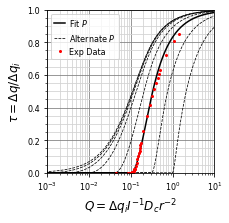

In [15]:
# Figure C3
path = 'C:/Users/mitch/Lab/Atlung Modeling/AMIDR/Analyzed Data/270/270 NM9505 30C Discharge/270 NM9505 30C Discharge Parsed.xlsx'
mass = 2.157
nQ = 1000
A = 3
B = 5             
        
fig, axs = plt.subplots(ncols = 1, nrows = 1, figsize=(3, 3))
plt.subplots_adjust(hspace = .25)

df = pd.read_excel(Path(path), sheet_name = '3.714 V - 3.702 V')

D = 5.9547E-12
r = 1.318e-4

Qdata1 = 3600*df[:28]['qi/I']*D/r**2
taudata1 = df[:28]['Fractional Capacity']

Qdata2 = 3600*df[28:37]['qi/I']*D/r**2
taudata2 = df[28:37]['Fractional Capacity']

Qdata3 = 3600*df[37:]['qi/I']*D/r**2
taudata3 = df[37:]['Fractional Capacity']

R_Ohm = np.array([0, 1e-3, 3.1622e-3, 1e-2, 4.1622e-2, .1028, 3.1622e-1, 1])
Q_arr = np.logspace(-4, 2, nQ)
tau_sol = np.zeros(nQ)
for i in range(len(R_Ohm)):
    tau_guess = 0.5
    for j in range(nQ):
        Q = Q_arr[j]
        func = lambda tau: tau - 1 + (1/(A*Q))*(1/B - 2*(np.sum(np.exp(-salphas*tau*Q)/salphas))) + R_Ohm[i]/Q if R_Ohm[i]<Q else tau 
        tau_sol[j] = fsolve(func, tau_guess, factor = 1.)
        if tau_sol[j] < 0:
            tau_sol[j] = 0

    if R_Ohm[i] == .1028: 
        plt.semilogx(Q_arr, tau_sol, '-k', linewidth = 1.5, label = 'Fit $P$')
    else:
        plt.semilogx(Q_arr, tau_sol, '--k')
    
plt.semilogx(0, 0, '--k', label = 'Alternate $P$')
    
axs.semilogx(Qdata1, taudata1, 'or', markersize = 2, label = 'Exp Data')
axs.semilogx(Qdata2, taudata2, 'or', markersize = 2)
axs.semilogx(Qdata3, taudata3, 'or', markersize = 2)

axs.set_xlabel('$Q=Δq_iI^{-1}D_cr^{-2}$')
axs.set_ylabel('$τ=Δq/Δq_i$')

axs.set_xlim([1e-3, 1e1])
axs.set_ylim([0, 1])

axs.xaxis.set_minor_locator(ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
axs.xaxis.set_major_locator(ticker.LogLocator(numticks = 10))
axs.yaxis.set_minor_locator(ticker.AutoMinorLocator())
axs.grid(which = 'minor', color = 'lightgrey')

axs.legend(fontsize = 8, frameon = True)

plt.savefig('figC3.png', bbox_inches="tight")

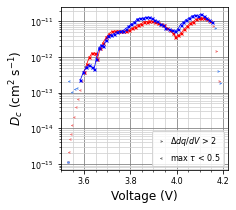

In [16]:
#Figure C4
path = 'C:/Users/Mitch/Lab/Atlung Modeling/AMIDR/Analyzed Data'
cells = ['266']
mincap = 0.5
maxdqdVchange = 2

fig, axs = plt.subplots(ncols = 1, nrows = 1, figsize = (3, 3))

# Find and read file data into dataframes
for cell in cells:
    cellpath = Path(path) / cell
    for halfcyclepath in sorted(cellpath.iterdir(), reverse = True):
        if halfcyclepath.is_dir():
            for fitfile in halfcyclepath.iterdir():
                if fitfile.is_file() and "harge Fitted" in str(fitfile):
                    if "Discharge Fitted" in str(fitfile):
                        halfcycle = 'Discharge'
                    elif "Charge Fitted" in str(fitfile):
                        halfcycle = 'Charge'
                    dfnew = pd.read_excel(fitfile)

                    # Remove datapoints where 
                    # dq/dV change between subsequent datapoint is greater than the max dqdV factor or
                    # the capacity span is less the minimum capacity span.
                    baddqdv = ~(((dfnew/dfnew.set_index(dfnew.index + 1))['dq/dV (mAh/gV)'] < maxdqdVchange) & \
                                ((dfnew/dfnew.set_index(dfnew.index + 1))['dq/dV (mAh/gV)'] > 0) & \
                                ((dfnew/dfnew.set_index(dfnew.index - 1))['dq/dV (mAh/gV)'] < maxdqdVchange) & \
                                ((dfnew/dfnew.set_index(dfnew.index - 1))['dq/dV (mAh/gV)'] > 0) & \
                                ((dfnew.set_index(dfnew.index + 1)/dfnew)['dq/dV (mAh/gV)'] < maxdqdVchange) & \
                                ((dfnew.set_index(dfnew.index + 1)/dfnew)['dq/dV (mAh/gV)'] > 0) & \
                                ((dfnew.set_index(dfnew.index - 1)/dfnew)['dq/dV (mAh/gV)'] < maxdqdVchange) & \
                                ((dfnew.set_index(dfnew.index - 1)/dfnew)['dq/dV (mAh/gV)'] > 0))[1:-1]
                    badcapspan = dfnew['Cap Span'] < mincap
                    keep = ~(baddqdv|badcapspan)

                    # Settings
                    if halfcycle == 'Discharge':
                        markerA = 'rx-'
                        markerB = 'r.--'
                        color = 'lightcoral'
                    elif halfcycle == 'Charge':
                        markerA = 'bx-'
                        markerB = 'b.--'
                        color = 'cornflowerblue'
                    else:
                        markerA = 'kx-'
                        markerB = 'k.--'
                        color = 'grey'
                    
                    # Plot individual cells with outliers removed
                    axs.semilogy(dfnew[keep]['Voltage (V)'], dfnew[keep]['Dc (cm^2/s)'], markerA)  

                    # Plot individual cell outliers (dqdv)
                    axs.semilogy(dfnew[baddqdv]['Voltage (V)'], dfnew[baddqdv]['Dc (cm^2/s)'], marker = '4', color = color, linestyle = 'None')

                    # Plot individual cell outliers (capspan)
                    axs.semilogy(dfnew[badcapspan]['Voltage (V)'], dfnew[badcapspan]['Dc (cm^2/s)'], marker = '3', color = color, linestyle = 'None')

axs.set_ylabel('$D_c$ (cm$\mathregular{^{2}\ s^{-1}}$)')
axs.set_xlabel('Voltage (V)')

axs.semilogy([], [], 'rx-')
axs.semilogy([], [], 'bx-')
axs.semilogy([], [], marker = '4', color = 'grey', linestyle = 'None', label = '$Δdq/dV$ > ' + str(maxdqdVchange))
axs.semilogy([], [], marker = '3', color = 'grey', linestyle = 'None', label = 'max $τ$ < ' + str(mincap))
axs.legend(frameon = True)

axs.xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs.yaxis.set_minor_locator(ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
axs.yaxis.set_major_locator(ticker.LogLocator(numticks = 10))

axs.grid(which = 'minor', color = 'lightgrey')

plt.savefig('figC4.png', bbox_inches = 'tight')

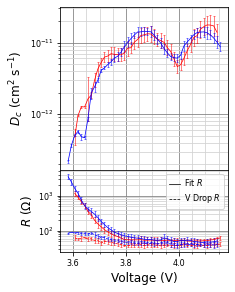

In [34]:
# Figure C5
path = 'C:/Users/Mitch/Lab/Atlung Modeling/AMIDR/Analyzed Data'
mats = ['NM9505 30C']
binfiles = ['NM9505 30C (266, 269, 270).xlsx']

dfD = [pd.read_excel(Path(path) / mats[0] / binfiles[0], sheet_name = 'Discharge')]
dfC = [pd.read_excel(Path(path) / mats[0] / binfiles[0], sheet_name = 'Charge')]

fig, axs = plt.subplots(ncols = 1, nrows = 2, figsize = (3, 4.5), sharex = True,
gridspec_kw = {'height_ratios': [2,1], 'hspace': 0.0})

axs[0].semilogy([], [])
axs[1].semilogy([], [], 'k-', label = 'Fit $R$')
axs[1].semilogy([], [], 'k--', label = 'V Drop $R$')
axs[1].legend(frameon = True)

for i in range(len(dfD)):
    yerrDDc = [dfD[i]['Dc (cm^2/s)']*(1 - 1/dfD[i]['Dc geoSTD']), dfD[i]['Dc (cm^2/s)']*(dfD[i]['Dc geoSTD'] - 1)]
    axs[0].errorbar(dfD[i]['Voltage (V)'], dfD[i]['Dc (cm^2/s)'], yerr = yerrDDc, fmt = 'r-', elinewidth = 0.5, markeredgewidth = 0.5, capsize = 1)

    yerrCDc = [dfC[i]['Dc (cm^2/s)']*(1 - 1/dfC[i]['Dc geoSTD']), dfC[i]['Dc (cm^2/s)']*(dfC[i]['Dc geoSTD'] - 1)]
    axs[0].errorbar(dfC[i]['Voltage (V)'], dfC[i]['Dc (cm^2/s)'], yerr = yerrCDc, fmt = 'b-', elinewidth = 0.5, markeredgewidth = 0.5, capsize = 1)
    
    yerrDRf = [dfD[i]['Rfit (Ohm)']*(1 - 1/dfD[i]['Rfit geoSTD']), dfD[i]['Rfit (Ohm)']*(dfD[i]['Rfit geoSTD'] - 1)]
    axs[1].errorbar(dfD[i]['Voltage (V)'], dfD[i]['Rfit (Ohm)'], yerr = yerrDRf, fmt = 'r-', elinewidth = 0.5, markeredgewidth = 0.5, capsize = 1)
    
    yerrCRf = [dfC[i]['Rfit (Ohm)']*(1 - 1/dfC[i]['Rfit geoSTD']), dfC[i]['Rfit (Ohm)']*(dfC[i]['Rfit geoSTD'] - 1)]
    axs[1].errorbar(dfC[i]['Voltage (V)'], dfC[i]['Rfit (Ohm)'], yerr = yerrCRf, fmt = 'b-', elinewidth = 0.5, markeredgewidth = 0.5, capsize = 1)
    
    yerrDRd = [dfD[i]['Rdrop (Ohm)']*(1 - 1/dfD[i]['Rdrop geoSTD']), dfD[i]['Rdrop (Ohm)']*(dfD[i]['Rdrop geoSTD'] - 1)]
    axs[1].errorbar(dfD[i]['Voltage (V)'], dfD[i]['Rdrop (Ohm)'], yerr = yerrDRd, fmt = 'r--', elinewidth = 0.5, markeredgewidth = 0.5, capsize = 1)
    
    yerrCRd = [dfC[i]['Rdrop (Ohm)']*(1 - 1/dfC[i]['Rdrop geoSTD']), dfC[i]['Rdrop (Ohm)']*(dfC[i]['Rdrop geoSTD'] - 1)]
    axs[1].errorbar(dfC[i]['Voltage (V)'], dfC[i]['Rdrop (Ohm)'], yerr = yerrCRd, fmt = 'b--', elinewidth = 0.5, markeredgewidth = 0.5, capsize = 1)

axs[0].set_ylabel('$D_c$ (cm$\mathregular{^{2}\ s^{-1}}$)')
axs[1].set_ylabel('$R$ (Ω)')
axs[1].set_xlabel('Voltage (V)')

axs[0].xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[0].yaxis.set_minor_locator(ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
axs[0].yaxis.set_major_locator(ticker.LogLocator(numticks = 10))
axs[1].yaxis.set_minor_locator(ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
axs[1].yaxis.set_major_locator(ticker.LogLocator(numticks = 10))

for t in axs[0].get_yticklabels():
    t.set_visible(True) 

axs[0].grid(which = 'minor', color = 'lightgrey')
axs[1].grid(which = 'minor', color = 'lightgrey')

plt.savefig('figC5.png', bbox_inches = 'tight')

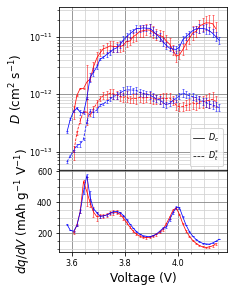

In [33]:
# Figure C6
path = 'C:/Users/Mitch/Lab/Atlung Modeling/AMIDR/Analyzed Data'
mats = ['NM9505 30C']
binfiles = ['NM9505 30C (266, 269, 270).xlsx']

dfD = [pd.read_excel(Path(path) / mats[0] / binfiles[0], sheet_name = 'Discharge')]
dfC = [pd.read_excel(Path(path) / mats[0] / binfiles[0], sheet_name = 'Charge')]

fig, axs = plt.subplots(ncols = 1, nrows = 2, figsize = (3, 4.5), sharex = True,
gridspec_kw = {'height_ratios': [2,1], 'hspace': 0.0})

axs[0].semilogy([], [], 'k-', label = '$D_{c}$')
axs[0].semilogy([], [], 'k--', label = '$D_{t}^{*}$')
axs[0].legend(frameon = True, loc = 'lower right')

for i in range(len(dfD)):
    yerrDDc = [dfD[i]['Dc (cm^2/s)']*(1 - 1/dfD[i]['Dc geoSTD']), dfD[i]['Dc (cm^2/s)']*(dfD[i]['Dc geoSTD'] - 1)]
    yerrDDt = [dfD[i]['Dt* (cm^2/s)']*(1 - 1/dfD[i]['Dt* geoSTD']), dfD[i]['Dt* (cm^2/s)']*(dfD[i]['Dt* geoSTD'] - 1)]
    axs[0].errorbar(dfD[i]['Voltage (V)'], dfD[i]['Dc (cm^2/s)'], yerr = yerrDDc, fmt = 'r-', elinewidth = 0.5, markeredgewidth = 0.5, capsize = 1)
    axs[0].errorbar(dfD[i]['Voltage (V)'], dfD[i]['Dt* (cm^2/s)'], yerr = yerrDDt, fmt = 'r--', elinewidth = 0.5, markeredgewidth = 0.5, capsize = 1)

    yerrCDc = [dfC[i]['Dc (cm^2/s)']*(1 - 1/dfC[i]['Dc geoSTD']), dfC[i]['Dc (cm^2/s)']*(dfC[i]['Dc geoSTD'] - 1)]
    yerrCDt = [dfC[i]['Dt* (cm^2/s)']*(1 - 1/dfC[i]['Dt* geoSTD']), dfC[i]['Dt* (cm^2/s)']*(dfC[i]['Dt* geoSTD'] - 1)]
    axs[0].errorbar(dfC[i]['Voltage (V)'], dfC[i]['Dc (cm^2/s)'], yerr = yerrCDc, fmt = 'b-', elinewidth = 0.5, markeredgewidth = 0.5, capsize = 1)
    axs[0].errorbar(dfC[i]['Voltage (V)'], dfC[i]['Dt* (cm^2/s)'], yerr = yerrCDt, fmt = 'b--', elinewidth = 0.5, markeredgewidth = 0.5, capsize = 1)
    
    axs[1].errorbar(dfD[i]['Voltage (V)'], dfD[i]['dq/dV (mAh/gV)'], yerr = dfD[i]['dq/dV STD'], fmt = 'r-', elinewidth = 0.5, markeredgewidth = 0.5, capsize = 1)
    
    axs[1].errorbar(dfC[i]['Voltage (V)'], dfC[i]['dq/dV (mAh/gV)'], yerr = dfC[i]['dq/dV STD'], fmt = 'b-', elinewidth = 0.5, markeredgewidth = 0.5, capsize = 1)

axs[0].set_ylabel('$D$ (cm$\mathregular{^{2}\ s^{-1}}$)')
axs[1].set_ylabel('$dq/dV$ (mAh g$\mathregular{^{-1}\ V^{-1}}$)')
axs[1].set_xlabel('Voltage (V)')

axs[0].xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[0].yaxis.set_minor_locator(ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
axs[0].yaxis.set_major_locator(ticker.LogLocator(numticks = 10))
axs[1].yaxis.set_minor_locator(ticker.AutoMinorLocator())

for t in axs[0].get_yticklabels():
    t.set_visible(True) 

axs[0].grid(which = 'minor', color = 'lightgrey')
axs[1].grid(which = 'minor', color = 'lightgrey')

plt.savefig('figC6.png', bbox_inches = 'tight')

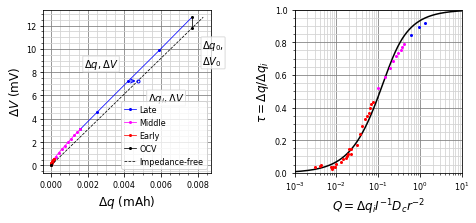

In [17]:
# Figure T1
path = 'C:/Users/mitch/Lab/Atlung Modeling/AMIDR/Analyzed Data/270/270 NM9505 30C Discharge/270 NM9505 30C Discharge Parsed.xlsx'
mass = 2.157
nQ = 1000
A = 3
B = 5             
        
fig, axs = plt.subplots(ncols = 2, nrows = 1, figsize=(7.5, 3))
plt.subplots_adjust(wspace = .5)

df = pd.read_excel(Path(path), sheet_name = '3.714 V - 3.702 V')

df['Capacity'] = df['Specific Capacity']*mass/1000

Vshift = 127.5373923*6.07E-06*1000
Qshift = Vshift/1000*302.8564265/1000*mass/1000/6.07E-06

qdata = [0]
Vdata = [0]
qdata0 = [(0.000287018-0.000279317)*1000, (0.000287018-0.000279317)*1000]
Vdata0 = [(3.404618422-3.3911185)*1000 - Vshift, (3.404618422-3.392830204)*1000]
qdata00 = [0, qdata0[1], Vdata0[0]/Vdata0[1]*qdata0[1]]
Vdata00 = [0, Vdata0[1], Vdata0[0]]

qdata1 = pd.concat([pd.Series([0]), df[14:28]['Capacity']])
Vdata1 = pd.concat([pd.Series([0]), df[14:28]['Voltage']- Vshift/1000])*1000

qdata2 = df[27:37]['Capacity']
Vdata2 = df[27:37]['Voltage']*1000 - Vshift

qdata3 = df[36:]['Capacity']
Vdata3 = df[36:]['Voltage']*1000 - Vshift

axs[0].plot([qdata3[39], qdata0[0]], [Vdata3[39], Vdata0[0]], 'b-')
axs[0].plot(qdata3, Vdata3, 'ob-', label = 'Late', markersize = 2)
axs[0].plot(qdata2, Vdata2, 'o-', color = 'magenta', label = 'Middle', markersize = 2)
axs[0].plot(qdata1, Vdata1, 'or-', label = 'Early', markersize = 2)
axs[0].plot(qdata0, Vdata0, 'ok-', label = 'OCV', markersize = 2)
axs[0].plot(qdata00, Vdata00, '--k', label = 'Impedance-free')
axs[0].plot(qdata, Vdata, 'ok', markersize = 2)
axs[0].plot((df[38:39]['Voltage']*1000 - Vshift)/Vdata00[1]*qdata00[1], df[38:39]['Voltage']*1000 - Vshift, 'ob', markersize = 3, fillstyle = 'none')

axs[0].set_xlabel('$Δq$ (mAh)')
axs[0].set_ylabel('$ΔV$ (mV)')

axs[0].xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[0].yaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[0].grid(which = 'minor', color = 'lightgrey')

axs[0].legend(fontsize = 8, frameon = True, loc = 'lower right')

axs[0].annotate('', xy=((df[38:39]['Voltage']*1000 - Vshift)/Vdata00[1]*qdata00[1], df[38:39]['Voltage']*1000 - Vshift), xycoords = 'data',
            xytext=(df[38:39]['Capacity'], df[38:39]['Voltage']*1000 - Vshift),
            arrowprops=dict(arrowstyle = '->', color = 'b'))
axs[0].annotate('$Δq, ΔV$', xy=(df[38:39]['Capacity'], df[38:39]['Voltage']*1000 - Vshift), xytext = (-10, 10), textcoords = 'offset pixels', ha = 'right', va = 'bottom', fontsize = 10, bbox = dict(boxstyle = 'round', fc = 'w', ec = 'lightgrey', pad = 0.1, alpha = 0.8))
axs[0].annotate('$Δq_i, ΔV$', xy=((df[38:39]['Voltage']*1000 - Vshift)/Vdata00[1]*qdata00[1], df[38:39]['Voltage']*1000 - Vshift), xytext = (10, -10), textcoords = 'offset pixels', ha = 'left', va = 'top', fontsize = 10, bbox = dict(boxstyle = 'round', fc = 'w', ec = 'lightgrey', pad = 0.1, alpha = 0.8))
axs[0].annotate('$Δq_0,$\n$ΔV_0$', xy=(qdata00[1], Vdata00[1]), xytext = (10, -10), textcoords = 'offset pixels', ha = 'left', va = 'top', fontsize = 10, bbox = dict(boxstyle = 'round', fc = 'w', ec = 'lightgrey', pad = 0.1, alpha = 0.8))

#axs[0].annotate('(a)', xy = (0.03, 0.97), xycoords = 'axes fraction', horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, bbox = dict(boxstyle = 'round', fc = 'w', ec = 'lightgrey', pad = 0.1, alpha = 0.8))

D = 5.9547E-12
r = 1.318e-4

Qdata1 = 3600*(df[:28]['qi/I'] - Qshift)*D/r**2
taudata1 = df[:28]['Fractional Capacity']*df[:28]['qi/I']/(df[:28]['qi/I'] - Qshift)

Qdata2 = 3600*(df[28:37]['qi/I'] - Qshift)*D/r**2
taudata2 = df[28:37]['Fractional Capacity']*df[28:37]['qi/I']/(df[28:37]['qi/I'] - Qshift)

Qdata3 = 3600*(df[37:]['qi/I'] - Qshift)*D/r**2
taudata3 = df[37:]['Fractional Capacity']*df[37:]['qi/I']/(df[37:]['qi/I'] - Qshift)

R_Ohm = np.array([0])
for i in range(len(R_Ohm)):
    Q_arr = np.logspace(-4, 2, nQ)
    tau_sol = np.zeros(nQ)
    tau_guess = 0.5
    for j in range(nQ):
        Q = Q_arr[j]
        func = lambda tau: tau - 1 + (1/(A*Q))*(1/B - 2*(np.sum(np.exp(-salphas*tau*Q)/salphas))) + R_Ohm[i]/Q if R_Ohm[i]<Q else tau 
        tau_sol[j] = fsolve(func, tau_guess, factor = 1.)
        if tau_sol[j] < 0:
            tau_sol[j] = 0

    if R_Ohm[i] == 0: 
        plt.semilogx(Q_arr, tau_sol, '-k', linewidth = 1.5, label = 'Fit $P$')
    else:
        plt.semilogx(Q_arr, tau_sol, '--k')
    
plt.semilogx(0, 0, '--k', label = 'Alternate $P$')
    
axs[1].semilogx(Qdata1, taudata1, 'or', markersize = 2)
axs[1].semilogx(Qdata2, taudata2, 'o', color = 'magenta', markersize = 2)
axs[1].semilogx(Qdata3, taudata3, 'ob', markersize = 2)

axs[1].set_xlabel('$Q=Δq_iI^{-1}D_cr^{-2}$')
axs[1].set_ylabel('$τ=Δq/Δq_i$')

axs[1].set_xlim([1e-3, 1e1])
axs[1].set_ylim([0, 1])

axs[1].xaxis.set_minor_locator(ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
axs[1].xaxis.set_major_locator(ticker.LogLocator(numticks = 10))
axs[1].yaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[1].grid(which = 'minor', color = 'lightgrey')

#axs[1].annotate('(b)', xy = (0.03, 0.97), xycoords = 'axes fraction', horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, bbox = dict(boxstyle = 'round', fc = 'w', ec = 'lightgrey', pad = 0.1, alpha = 0.8))

#axs[1].legend(fontsize = 8, frameon = True, loc = 'upper left')

plt.savefig('figT1.png', bbox_inches="tight")

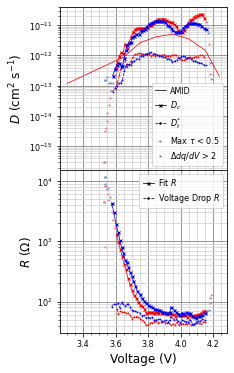

In [26]:
#Figure T2
path = 'C:/Users/Mitch/Lab/Atlung Modeling/AMIDR/Analyzed Data'
cells = ['270']
mincap = 0.5
maxdqdVchange = 2

fig, axs = plt.subplots(ncols = 1, nrows = 2, figsize = (3, 6), sharex = 'col',
gridspec_kw = {'height_ratios': [2, 2], 'hspace': 0.0})

dfamid = pd.read_excel('C:/Users/Mitch/Lab/Commercial Material/ZhenHua/Atlung/Data/151/MAB.211022.151/MAB.211022.151 Fitted (sphere).xlsx')
axs[0].semilogy(dfamid['Voltage'], dfamid['D'], 'r-')

# Find and read file data into dataframes
for cell in cells:
    cellpath = Path(path) / cell
    for halfcyclepath in sorted(cellpath.iterdir(), reverse = True):
        if halfcyclepath.is_dir():
            for fitfile in halfcyclepath.iterdir():
                if fitfile.is_file() and "harge Fitted" in str(fitfile):
                    if "Discharge Fitted" in str(fitfile):
                        halfcycle = 'Discharge'
                    elif "Charge Fitted" in str(fitfile):
                        halfcycle = 'Charge'
                    dfnew = pd.read_excel(fitfile)

                    # Remove datapoints where 
                    # dq/dV change between subsequent datapoint is greater than the max dqdV factor or
                    # the capacity span is less the minimum capacity span.
                    baddqdv = ~(((dfnew/dfnew.set_index(dfnew.index + 1))['dq/dV (mAh/gV)'] < maxdqdVchange) & \
                                ((dfnew/dfnew.set_index(dfnew.index + 1))['dq/dV (mAh/gV)'] > 0) & \
                                ((dfnew/dfnew.set_index(dfnew.index - 1))['dq/dV (mAh/gV)'] < maxdqdVchange) & \
                                ((dfnew/dfnew.set_index(dfnew.index - 1))['dq/dV (mAh/gV)'] > 0) & \
                                ((dfnew.set_index(dfnew.index + 1)/dfnew)['dq/dV (mAh/gV)'] < maxdqdVchange) & \
                                ((dfnew.set_index(dfnew.index + 1)/dfnew)['dq/dV (mAh/gV)'] > 0) & \
                                ((dfnew.set_index(dfnew.index - 1)/dfnew)['dq/dV (mAh/gV)'] < maxdqdVchange) & \
                                ((dfnew.set_index(dfnew.index - 1)/dfnew)['dq/dV (mAh/gV)'] > 0))[1:-1]
                    badcapspan = dfnew['Cap Span'] < mincap
                    keep = ~(baddqdv|badcapspan)

                    # Settings
                    if halfcycle == 'Discharge':
                        markerA = 'rx-'
                        markerB = 'r.--'
                        color = 'lightcoral'
                    elif halfcycle == 'Charge':
                        markerA = 'bx-'
                        markerB = 'b.--'
                        color = 'cornflowerblue'
                    else:
                        markerA = 'kx-'
                        markerB = 'k.--'
                        color = 'grey'
                    
                    # Plot individual cells with outliers removed
                    axs[0].semilogy(dfnew[keep]['Voltage (V)'], dfnew[keep]['Dc (cm^2/s)'], markerA)
                    axs[0].semilogy(dfnew[keep]['Voltage (V)'], dfnew[keep]['Dt* (cm^2/s)'], markerB, markersize = 1.5)                            
                    axs[1].semilogy(dfnew[keep]['Initial Voltage (V)'], dfnew[keep]['Rfit (Ohm)'], markerA)
                    axs[1].semilogy(dfnew[keep]['Initial Voltage (V)'], dfnew[keep]['Rdrop (Ohm)'], markerB, markersize = 1.5)

                    # Plot individual cell outliers (dqdv)
                    axs[0].semilogy(dfnew[baddqdv]['Voltage (V)'], dfnew[baddqdv]['Dc (cm^2/s)'], marker = '4', color = color, linestyle = 'None')
                    #axs[0].semilogy(dfnew[baddqdv]['Voltage (V)'], dfnew[baddqdv]['Dt* (cm^2/s)'], marker = '4', color = color, linestyle = 'None')                            
                    axs[1].semilogy(dfnew[baddqdv]['Initial Voltage (V)'], dfnew[baddqdv]['Rfit (Ohm)'], marker = '4', color = color, linestyle = 'None')                       
                    #axs[1].semilogy(dfnew[baddqdv]['Initial Voltage (V)'], dfnew[baddqdv]['Rdrop (Ohm)'], marker = '4', color = color, linestyle = 'None')

                    # Plot individual cell outliers (capspan)
                    axs[0].semilogy(dfnew[badcapspan]['Voltage (V)'], dfnew[badcapspan]['Dc (cm^2/s)'], marker = '3', color = color, linestyle = 'None')
                    #axs[0].semilogy(dfnew[badcapspan]['Voltage (V)'], dfnew[badcapspan]['Dt* (cm^2/s)'], marker = '3', color = color, linestyle = 'None')                            
                    axs[1].semilogy(dfnew[badcapspan]['Initial Voltage (V)'], dfnew[badcapspan]['Rfit (Ohm)'], marker = '3', color = color, linestyle = 'None')                      
                    #axs[1].semilogy(dfnew[badcapspan]['Initial Voltage (V)'], dfnew[badcapspan]['Rdrop (Ohm)'], marker = '3', color = color, linestyle = 'None')
    
axs[0].set_ylabel('$D$ (cm$\mathregular{^{2}\ s^{-1}}$)')
axs[1].set_ylabel('$R$ (Ω)')
#axs[1].set_xlabel('x in Li$\mathregular{_{x}N_{0.95}Mn_{0.05}O_{2}}$')
axs[1].set_xlabel('Voltage (V)')

axs[0].semilogy([], [], 'k-', label = 'AMID')
axs[0].semilogy([], [], 'kx-', label = '$D_{c}$')
axs[0].semilogy([], [], 'k.--', label = '$D_{t}^{*}$')
axs[0].plot([], [], marker = '3', color = 'grey', linestyle = 'None', label = 'Max $τ$ < '  + str(mincap))
axs[0].plot([], [], marker = '4', color = 'grey', linestyle = 'None', label = '$Δdq/dV$ > ' + str(maxdqdVchange))
axs[0].legend(frameon = True, loc = 'lower right')

axs[1].semilogy([], [], 'kx-', label = 'Fit $R$')
axs[1].semilogy([], [], 'k.--', label = 'Voltage Drop $R$')
axs[1].legend(frameon = True)

axs[0].xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[0].yaxis.set_minor_locator(ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
axs[0].yaxis.set_major_locator(ticker.LogLocator(numticks = 10))
axs[1].yaxis.set_minor_locator(ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
axs[1].yaxis.set_major_locator(ticker.LogLocator(numticks = 10))

axs[0].grid(which = 'minor', color = 'lightgrey')
axs[1].grid(which = 'minor', color = 'lightgrey')

plt.savefig('figT2.png', bbox_inches = 'tight')

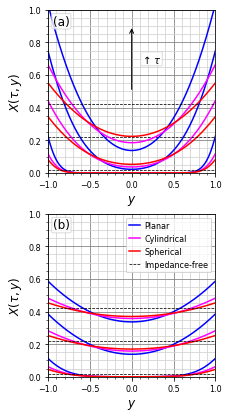

In [70]:
#Figure Th1
y_arr = np.linspace(-1, 1, 1000)
tau_arr = np.linspace(0.02, 0.42, 3)
Q_arr = [0.5, 2]
title = ['(a)', '(b)']

pCfunc = lambda a, y: np.cos(a*y)/np.cos(a)
cCfunc = lambda a, y: jv(0, a*y)/jv(0, a)
sCfunc = lambda a, y: np.sin(a*y)/(y*np.sin(a))

fig, axs = plt.subplots(ncols = 1, nrows = 2, figsize = (3, 6.75))
plt.subplots_adjust(hspace = 0.25)

for Q in range(len(Q_arr)):
    pfunc = lambda tau, y: tau + (1/(1*Q_arr[Q]))*(1/3 + y**2/2 - 1/2 - 2*(np.sum(np.exp(-palphas*tau*Q_arr[Q])/palphas*pCfunc(np.sqrt(palphas), y))))
    cfunc = lambda tau, y: tau + (1/(2*Q_arr[Q]))*(1/4 + y**2/2 - 1/2 - 2*(np.sum(np.exp(-calphas*tau*Q_arr[Q])/calphas*cCfunc(np.sqrt(calphas), y))))
    sfunc = lambda tau, y: tau + (1/(3*Q_arr[Q]))*(1/5 + y**2/2 - 1/2 - 2*(np.sum(np.exp(-salphas*tau*Q_arr[Q])/salphas*sCfunc(np.sqrt(salphas), y))))
    
    pX_sol = np.zeros([len(tau_arr), len(y_arr)])
    cX_sol = np.zeros([len(tau_arr), len(y_arr)])
    sX_sol = np.zeros([len(tau_arr), len(y_arr)])

    for i in range(len(tau_arr)):
        for j in range(len(y_arr)):
            pX_sol[i, j] = pfunc(tau_arr[i], y_arr[j])
            cX_sol[i, j] = cfunc(tau_arr[i], y_arr[j])
            sX_sol[i, j] = sfunc(tau_arr[i], y_arr[j])
    
        axs[Q].plot(y_arr, pX_sol[i], '-b', linewidth = 1.5)
        axs[Q].plot(y_arr, cX_sol[i], '-', color = 'magenta', linewidth = 1.5)
        axs[Q].plot(y_arr, sX_sol[i], '-r', linewidth = 1.5)
    
        axs[Q].plot(y_arr, tau_arr[i]*np.ones(len(y_arr)), '--k')
    
    axs[Q].plot([], [], '-b', linewidth = 1.5, label="Planar")
    axs[Q].plot([], [], '-', color = 'magenta', linewidth = 1.5, label="Cylindrical")
    axs[Q].plot([], [], '-r', linewidth = 1.5, label="Spherical")
    axs[Q].plot([], [], '--k', label="Impedance-free")
    
    axs[Q].set_xlim([-1, 1])
    axs[Q].set_ylim([0, 1])
    
    axs[Q].set_xlabel('$y$')
    axs[Q].set_ylabel('$X(τ, y)$')
    
    axs[Q].annotate(title[Q], xy = (0.03, 0.97), xycoords = 'axes fraction', horizontalalignment = 'left', verticalalignment = 'top', fontsize = 12, bbox = dict(boxstyle = 'round', fc = 'w', ec = 'lightgrey', pad = 0.1, alpha = 0.8))

    axs[Q].xaxis.set_minor_locator(ticker.AutoMinorLocator())
    axs[Q].yaxis.set_minor_locator(ticker.AutoMinorLocator())
    axs[Q].grid(which = 'minor', color = 'lightgrey')
    
axs[1].legend(frameon = True, fontsize = 8)

axs[0].annotate('', xy=(0, 0.9), xycoords = 'data', xytext=(0, 0.5), arrowprops=dict(arrowstyle = '->', color = 'k'))
axs[0].annotate('↑ $τ$', xy=(0, 0.7), xytext = (10, 0), textcoords = 'offset pixels', ha = 'left', va = 'center', fontsize = 10, bbox = dict(boxstyle = 'round', fc = 'w', ec = 'lightgrey', pad = 0.1, alpha = 0.8))

plt.savefig('figTh1.png', bbox_inches = "tight")

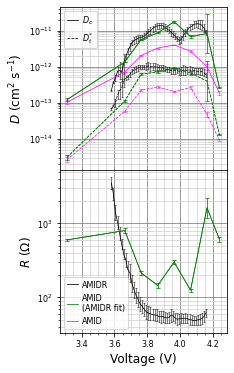

In [31]:
#Figure Th5
path = 'C:/Users/Mitch/Lab/Atlung Modeling/AMIDR/Analyzed Data'
path2 = 'C:/Users/Mitch/Lab/Commercial Material/ZhenHua/Atlung/Data'
mats = ['NM9505 30C', 'NM9505 30C', 'NM9505 30C-r']
binfiles = ['NM9505 30C (266, 269, 270).xlsx', 'NM9505 30C (149, 150, 151).xlsx', 'NM9505 30C-r (149, 150, 151).xlsx']

df = [pd.read_excel(Path(path) / mats[0] / binfiles[0], sheet_name = 'All'), pd.read_excel(Path(path2) / mats[1] / binfiles[1], sheet_name = 'All'), pd.read_excel(Path(path2) / mats[2] / binfiles[2], sheet_name = 'All'), pd.read_excel(Path(path2) / mats[2] / binfiles[2], sheet_name = 'All')]
df[1] = df[1][np.isfinite(df[1]['Dc (cm^2/s)'])]
df[2] = df[2][np.isfinite(df[2]['Dc (cm^2/s)'])]
df[3] = df[3][np.isfinite(df[3]['Rfit (Ohm)'])]

fig, axs = plt.subplots(ncols = 1, nrows = 2, figsize = (3, 6), sharex = 'col',
gridspec_kw = {'height_ratios': [2, 2], 'hspace': 0.0})

axs[0].semilogy([], [], 'k-', label = '$D_{c}$')
axs[0].semilogy([], [], 'k--', label = '$D_{t}^{*}$')
axs[0].legend(frameon = True)

axs[1].semilogy([], [], 'k-', label = 'AMIDR')
axs[1].semilogy([], [], 'g-', label = 'AMID\n(AMIDR fit)')
axs[1].semilogy([], [], '-', color = 'magenta', label = 'AMID')
axs[1].legend(frameon = True)

color = ['k', 'magenta', 'g', 'g']
for i in range(len(df)):
    if i == 0:
        capsize = 1
    else:
        capsize = 2
    
    yerrDc = [df[i]['Dc (cm^2/s)']*(1 - 1/df[i]['Dc geoSTD']), df[i]['Dc (cm^2/s)']*(df[i]['Dc geoSTD'] - 1)]
    yerrDt = [df[i]['Dt* (cm^2/s)']*(1 - 1/df[i]['Dt* geoSTD']), df[i]['Dt* (cm^2/s)']*(df[i]['Dt* geoSTD'] - 1)]
    axs[0].errorbar(df[i]['Voltage (V)'], df[i]['Dc (cm^2/s)'], yerr = yerrDc, fmt = '-', color = color[i], elinewidth = 0.5, markeredgewidth = 0.5, capsize = capsize)
    axs[0].errorbar(df[i]['Voltage (V)'], df[i]['Dt* (cm^2/s)'], yerr = yerrDt, fmt = '--', color = color[i], elinewidth = 0.5, markeredgewidth = 0.5, capsize = capsize)
    
    yerrR = [df[i]['Rfit (Ohm)']*(1 - 1/df[i]['Rfit geoSTD']), df[i]['Rfit (Ohm)']*(df[i]['Rfit geoSTD'] - 1)]
    axs[1].errorbar(df[i]['Voltage (V)'], df[i]['Rfit (Ohm)'], yerr = yerrR, fmt = '-', color = color[i], elinewidth = 0.5, markeredgewidth = 0.5, capsize = capsize)
        
axs[0].set_ylabel('$D$ (cm$\mathregular{^{2}\ s^{-1}}$)')
axs[1].set_ylabel('$R$ (Ω)')
axs[1].set_xlabel('Voltage (V)')

axs[0].xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[0].yaxis.set_minor_locator(ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
axs[0].yaxis.set_major_locator(ticker.LogLocator(numticks = 10))
axs[1].yaxis.set_minor_locator(ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
axs[1].yaxis.set_major_locator(ticker.LogLocator(numticks = 10))

axs[0].grid(which = 'minor', color = 'lightgrey')
axs[1].grid(which = 'minor', color = 'lightgrey')

plt.savefig('figTh5.png', bbox_inches = 'tight')

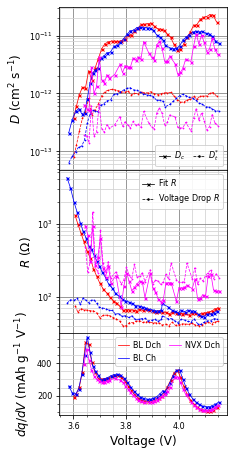

In [29]:
#Figure Th6
path = 'C:/Users/Mitch/Lab/Atlung Modeling/AMIDR/Analyzed Data'
cells = ['270']
path2 = 'C:/Users/Mitch/Lab/Commercial Material/ZhenHua/Atlung/Data'
cells2 = ['173']
mincap = 0.5
maxdqdVchange = 2

fig, axs = plt.subplots(ncols = 1, nrows = 3, figsize = (3, 7.5), sharex = 'col',
gridspec_kw = {'height_ratios': [2, 2, 1], 'hspace': 0.0})

# Find and read file data into dataframes
for cell in cells:
    cellpath = Path(path) / cell
    for halfcyclepath in sorted(cellpath.iterdir(), reverse = True):
        if halfcyclepath.is_dir():
            for fitfile in halfcyclepath.iterdir():
                if fitfile.is_file() and "harge Fitted" in str(fitfile):
                    if "Discharge Fitted" in str(fitfile):
                        halfcycle = 'Discharge'
                    elif "Charge Fitted" in str(fitfile):
                        halfcycle = 'Charge'
                    dfnew = pd.read_excel(fitfile)

                    # Remove datapoints where 
                    # dq/dV change between subsequent datapoint is greater than the max dqdV factor or
                    # the capacity span is less the minimum capacity span.
                    baddqdv = ~(((dfnew/dfnew.set_index(dfnew.index + 1))['dq/dV (mAh/gV)'] < maxdqdVchange) & \
                                ((dfnew/dfnew.set_index(dfnew.index + 1))['dq/dV (mAh/gV)'] > 0) & \
                                ((dfnew/dfnew.set_index(dfnew.index - 1))['dq/dV (mAh/gV)'] < maxdqdVchange) & \
                                ((dfnew/dfnew.set_index(dfnew.index - 1))['dq/dV (mAh/gV)'] > 0) & \
                                ((dfnew.set_index(dfnew.index + 1)/dfnew)['dq/dV (mAh/gV)'] < maxdqdVchange) & \
                                ((dfnew.set_index(dfnew.index + 1)/dfnew)['dq/dV (mAh/gV)'] > 0) & \
                                ((dfnew.set_index(dfnew.index - 1)/dfnew)['dq/dV (mAh/gV)'] < maxdqdVchange) & \
                                ((dfnew.set_index(dfnew.index - 1)/dfnew)['dq/dV (mAh/gV)'] > 0))[1:-1]
                    badcapspan = dfnew['Cap Span'] < mincap
                    keep = ~(baddqdv|badcapspan)

                    # Settings
                    if halfcycle == 'Discharge':
                        markerA = 'rx-'
                        markerB = 'r.--'
                    elif halfcycle == 'Charge':
                        markerA = 'bx-'
                        markerB = 'b.--'
                    else:
                        markerA = 'kx-'
                        markerB = 'k.--'
                    
                    # Plot individual cells with outliers removed
                    axs[0].semilogy(dfnew[keep]['Voltage (V)'], dfnew[keep]['Dc (cm^2/s)'], markerA)
                    axs[0].semilogy(dfnew[keep]['Voltage (V)'], dfnew[keep]['Dt* (cm^2/s)'], markerB, markersize = 1.5)                            
                    axs[1].semilogy(dfnew[keep]['Initial Voltage (V)'], dfnew[keep]['Rfit (Ohm)'], markerA)
                    axs[1].semilogy(dfnew[keep]['Initial Voltage (V)'], dfnew[keep]['Rdrop (Ohm)'], markerB, markersize = 1.5)
                    axs[2].plot(dfnew[keep]['Voltage (V)'], dfnew[keep]['dq/dV (mAh/gV)'], markerA)

# Find and read file data into dataframes
for cell in cells2:
    cellpath = Path(path2) / cell
    for halfcyclepath in sorted(cellpath.iterdir(), reverse = True):
        if halfcyclepath.is_dir():
            for fitfile in halfcyclepath.iterdir():
                if fitfile.is_file() and "harge Fitted" in str(fitfile):
                    if "Discharge Fitted" in str(fitfile):
                        halfcycle = 'Discharge'
                    elif "Charge Fitted" in str(fitfile):
                        halfcycle = 'Charge'
                    dfnew = pd.read_excel(fitfile)

                    # Remove datapoints where 
                    # dq/dV change between subsequent datapoint is greater than the max dqdV factor or
                    # the capacity span is less the minimum capacity span.
                    baddqdv = ~(((dfnew/dfnew.set_index(dfnew.index + 1))['dq/dV (mAh/gV)'] < maxdqdVchange) & \
                                ((dfnew/dfnew.set_index(dfnew.index + 1))['dq/dV (mAh/gV)'] > 0) & \
                                ((dfnew/dfnew.set_index(dfnew.index - 1))['dq/dV (mAh/gV)'] < maxdqdVchange) & \
                                ((dfnew/dfnew.set_index(dfnew.index - 1))['dq/dV (mAh/gV)'] > 0) & \
                                ((dfnew.set_index(dfnew.index + 1)/dfnew)['dq/dV (mAh/gV)'] < maxdqdVchange) & \
                                ((dfnew.set_index(dfnew.index + 1)/dfnew)['dq/dV (mAh/gV)'] > 0) & \
                                ((dfnew.set_index(dfnew.index - 1)/dfnew)['dq/dV (mAh/gV)'] < maxdqdVchange) & \
                                ((dfnew.set_index(dfnew.index - 1)/dfnew)['dq/dV (mAh/gV)'] > 0))[1:-1]
                    badcapspan = ~(dfnew['Cap Span'] > mincap)
                    keep = ~(baddqdv|badcapspan)

                    # Settings
                    if halfcycle == 'Discharge':
                        markerA = 'x-'
                        markerB = '.--'
                    elif halfcycle == 'Charge':
                        markerA = 'bx-'
                        markerB = 'b.--'
                    else:
                        markerA = 'kx-'
                        markerB = 'k.--'
                    
                    # Plot individual cells with outliers removed
                    axs[0].semilogy(dfnew[keep]['Voltage (V)'], dfnew[keep]['Dc (cm^2/s)'], markerA, color = 'magenta')
                    axs[0].semilogy(dfnew[keep]['Voltage (V)'], dfnew[keep]['Dt* (cm^2/s)'], markerB, markersize = 1.5, color = 'magenta')                            
                    axs[1].semilogy(dfnew[keep]['Initial Voltage (V)'], dfnew[keep]['Rfit (Ohm)'], markerA, color = 'magenta')
                    axs[1].semilogy(dfnew[keep]['Initial Voltage (V)'], dfnew[keep]['Rdrop (Ohm)'], markerB, markersize = 1.5, color = 'magenta')
                    axs[2].plot(dfnew[keep]['Voltage (V)'], dfnew[keep]['dq/dV (mAh/gV)'], markerA, color = 'magenta')
                    
axs[0].set_ylabel('$D$ (cm$\mathregular{^{2}\ s^{-1}}$)')
axs[1].set_ylabel('$R$ (Ω)')
axs[2].set_xlabel('Voltage (V)')
axs[2].set_ylabel('$dq/dV$ (mAh g$\mathregular{^{-1}\ V^{-1}}$)')
#axs[1].set_xlabel('x in Li$\mathregular{_{x}N_{0.95}Mn_{0.05}O_{2}}$')

axs[0].semilogy([], [], 'kx-', label = '$D_{c}$')
axs[0].semilogy([], [], 'k.--', label = '$D_{t}^{*}$')
axs[0].legend(frameon = True, ncol = 2, loc = 'lower right')

axs[1].semilogy([], [], 'kx-', label = 'Fit $R$')
axs[1].semilogy([], [], 'k.--', label = 'Voltage Drop $R$')
axs[1].legend(frameon = True)

axs[2].plot([], [], '-', color = 'r', label = 'BL Dch')
axs[2].plot([], [], '-', color = 'b', label = 'BL Ch')
axs[2].plot([], [], '-', color = 'magenta', label = 'NVX Dch')
axs[2].legend(frameon = True, loc = 'upper right', ncol = 2)

axs[0].xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs[0].yaxis.set_minor_locator(ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
axs[0].yaxis.set_major_locator(ticker.LogLocator(numticks = 10))
axs[1].yaxis.set_minor_locator(ticker.LogLocator(subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
axs[1].yaxis.set_major_locator(ticker.LogLocator(numticks = 10))
axs[2].yaxis.set_minor_locator(ticker.AutoMinorLocator())

axs[0].grid(which = 'minor', color = 'lightgrey')
axs[1].grid(which = 'minor', color = 'lightgrey')
axs[2].grid(which = 'minor', color = 'lightgrey')

plt.savefig('figTh6.png', bbox_inches = 'tight')

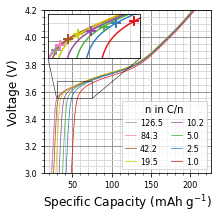

In [91]:
#Figure Th9
path = Path('C:/Users/mitch/Lab/Atlung Modeling/NMC622 Rate Map Data/EZ_C-270_ratemap_30C_220705_EZ_concat_fin')
cell = 'EZ_C-270_ratemap_30C_220705_EZ_concat_fin.csv'

fname = path / cell
with open(fname, 'r') as f:
    f.readline()
    cellname = f.readline().strip().split()[-1]
    f.readline()
    f.readline()
    mass = float(f.readline().strip().split()[-1]) / 1000
    capacity = float(f.readline().strip().split()[-1])
    for i in range(4):
        f.readline()
    if f.readline().strip().split()[0] == '[Data]':
        hlinenum = 11
    else:
        hlinenum = 12
        
df = pd.read_csv(fname, header=hlinenum)

last_step = df['Prot.Step'].values[-1]
ratemap = df.loc[(df['Prot.Step'] > 3)]
discharges = ratemap.loc[df['Step'] == 2]
dischargesfilt = discharges.loc[df['Meas I (A)'] < 0]
unique_steps = dischargesfilt['Prot.Step'].unique()[0:]
ndis = len(unique_steps)

colors = plt.get_cmap('Set1')(np.linspace(0, 1, 8))
colors[4] = [0.8, 0.8, 0, 1.]

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(3, 3))
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
axins = zoomed_inset_axes(axs, 2.6, loc=2)

for i in reversed(range(ndis)):
    step = discharges.loc[discharges['Prot.Step'] == unique_steps[i]]
    currents = step['Meas I (A)'].values
    
    #finding the C-rate at this step
    rate = round(capacity/(abs(1000*np.mean(currents))),1)
    
    #estimating positive feedback loop initiation
    endcap = np.min(step['Capacity (Ah)'].values)*1000/mass
    
    lstart = step.loc[(step['Capacity (Ah)']*1000/mass - endcap - 28 + 1.8*i).abs().idxmin()]
    
    if rate > 0.8:
        axs.plot(step['Capacity (Ah)'].values*1000/mass, step['Potential (V)'].values, color = colors[i-3], label = rate)
        
        axins.plot(step['Capacity (Ah)'].values*1000/mass, step['Potential (V)'].values, color = colors[i-3], linewidth = 1.5, label = rate)
        axins.scatter(lstart['Capacity (Ah)']*1000/mass, lstart['Potential (V)'], s = 4, marker = '+', color = colors[i-3], linewidth = 10, zorder = 4)

axs.legend(ncol = 2, frameon = True, title = 'n in C/n')
axs.set_xlabel('Specific Capacity (mAh g$\mathregular{^{-1}}$)')
axs.set_ylabel('Voltage (V)')
axs.set_ylim([3.0, 4.2])

axs.xaxis.set_minor_locator(ticker.AutoMinorLocator())
axs.yaxis.set_minor_locator(ticker.AutoMinorLocator())
axs.grid(which = 'minor', color = 'lightgrey')
axs.set_axisbelow(True)

axins.set_xlim(30, 75)
axins.set_ylim(3.55, 3.675)
axins.set_xticks([50], [])
axins.set_yticks([3.6], [])
axins.set_xticks([40, 60, 70], minor = True)
axins.set_yticks([3.65], minor = True)
axins.grid(which = 'minor', color = 'lightgrey')
axins.tick_params(which = 'both', left = False, bottom = False)
mark_inset(axs, axins, loc1=3, loc2=4, fc="none", ec="k", linewidth = 0.5, zorder = 3)

plt.savefig('figTh9.png', bbox_inches='tight')